In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'


### Подготовим данные по задолженности

In [2]:
# импортируем первый эксель с данными по кредитной задолженности до февраля 2019 года
data_before_feb_2019 = pd.read_excel("302-05.xlsx", na_values=["NA"])
data_before_feb_2019.head(10)


Задолженность по кредитам, предоставленным юридическим лицам - резидентам и индивидуальным предпринимателям в рублях, по видам экономической деятельности и отдельным направлениям использования средств  \
0                                           млн.руб.                                                                                                                                                         
1                                                NaN                                                                                                                                                         
2                                      Отчетная дата                                                                                                                                                         
3                                                NaN                                                                                                                                                         
4                                                NaN                                                                                                                                                         
5                                                NaN                                                                                                                                                         
6                                2009-04-01 00:00:00                                                                                                                                                         
7                                2009-05-01 00:00:00                                                                                                                                                         
8                                2009-06-01 00:00:00                                                                                                                                                         
9                                2009-07-01 00:00:00                                                                                                                                                         

                  Unnamed: 1                  Unnamed: 2  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2  Задолженность по кредитам                         NaN   
3                      Всего  добыча полезных ископаемых   
4                        NaN                         NaN   
5                        NaN                         NaN   
6                    9174235                      320171   
7                    9122247                      287708   
8                    9140944                      287192   
9                    9063617                      251739   

                                          Unnamed: 3  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                            из них:   
4  добыча топливно-энергетических полезных ископа...   
5                                                NaN   
6                                             187222   
7                                             155815   
8                                             154657   
9                                             118066   

                    Unnamed: 4  \
0                          NaN   
1                          NaN   
2                          NaN   
3  обрабатывающие производства   
4                          NaN   
5                          NaN   
6                      1733933   
7                      1731607   
8                      1723134   
9                      1711269   

                                          Unnamed: 5  \
0                         

In [3]:
# нам интересны столбцы Отчетная дата и Всего (в млн. руб)
# проверим тип данных и пропуски
# также проверим что в столбце Всего приведена сумма всех остальных столбцов
data_before_feb_2019_ = data_before_feb_2019.drop([0,1,2,3,4,5])
data_before_feb_2019_.rename(columns={"Задолженность \
по кредитам, предоставленным юридическим лицам - резидентам и индивидуальным предпринимателям в рублях\
, по видам экономической деятельности и отдельным направлениям использования средств": "date", "Unnamed: 1": "total debt in rub"}, inplace=True)
data_before_feb_2019_.reset_index(drop=True, inplace=True)
data_before_feb_2019_


date total debt in rub Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0    2009-04-01 00:00:00           9174235     320171     187222    1733933   
1    2009-05-01 00:00:00           9122247     287708     155815    1731607   
2    2009-06-01 00:00:00           9140944     287192     154657    1723134   
3    2009-07-01 00:00:00           9063617     251739     118066    1711269   
4    2009-08-01 00:00:00           9043354     251191     117767    1734748   
..                   ...               ...        ...        ...        ...   
113  2018-09-01 00:00:00          24922210    1511048    1315912    4845563   
114  2018-10-01 00:00:00          25067351    1469811    1278124    4945878   
115  2018-11-01 00:00:00          25382809    1460545    1271759    4997743   
116  2018-12-01 00:00:00          25623056    1535720    1339159    4967111   
117  2019-01-01 00:00:00          25760819    1732788    1531816    4922293   

    Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 17  \
0       368981      42652      43351      39265      98250  ...      638945   
1       371464      42804      44139      36657      93092  ...      653357   
2       366692      42963      43834      39665      91705  ...      665906   
3       369759      41549      42983      42335      90873  ...      673918   
4       373272      42024      44022      45209      89968  ...      689072   
..         ...        ...        ...        ...        ...  ...         ...   
113     829529      95772     124638     361966     358639  ...     1777360   
114     841255      96417     130350     358378     364730  ...     1782770   
115     860382      95544     130139     369567     368431  ...     1821642   
116     843139      95140     137074     293512     370654  ...     1859560   
117     803120      95025     143024     324429     370894  ...     1881368   

    Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0        577601      874494      610188      503467       37657     2310931   
1        599345      875360      608251      514757       39564     2282204   
2        608226      880671      618918      537458       39376     2266891   
3        615667      865198      601647      493562       37639     2271800   
4        629965      860139      599553      423558       38665     2284861   
..          ...         ...         ...         ...         ...         ...   
113     1749034     1509438     1270498     1931708      122963     3682471   
114     1754008     1529206     1279159     1971301      124112     3720785   
115     1792500     1517804     1278380     1975660      117079     3838892   
116     1829775     1506516     1260652     2002082      119941     3892913   
117     1853036     1399236     1174401     1997672      125900     3864086   

    Unnamed: 24 Unnamed: 25 Unnamed: 26  
0        863857     1525409      118828  
1        859101     1523302      115499  
2        875832     1501179      107697  
3        891203     1506270      100180  
4        916023     1474502       96800  
..          ...         ...         ...  
113     3784019     4394741      243086  
114     3717122     4418311      257202  
115     3754066     4467793      260866  
116     3745862     4508982      279348  
117     3746886     4648662      250718  

[118 rows x 27 columns]

In [4]:
data_before_feb_2019_['date'] = pd.to_datetime(data_before_feb_2019_['date'])
data_before_feb_2019___ = data_before_feb_2019_.convert_dtypes()  

Стоит учесть, что уточняющие столбцы (с пометкой "из них") не нужно складывать, чтобы не учитывать эти данные дважды

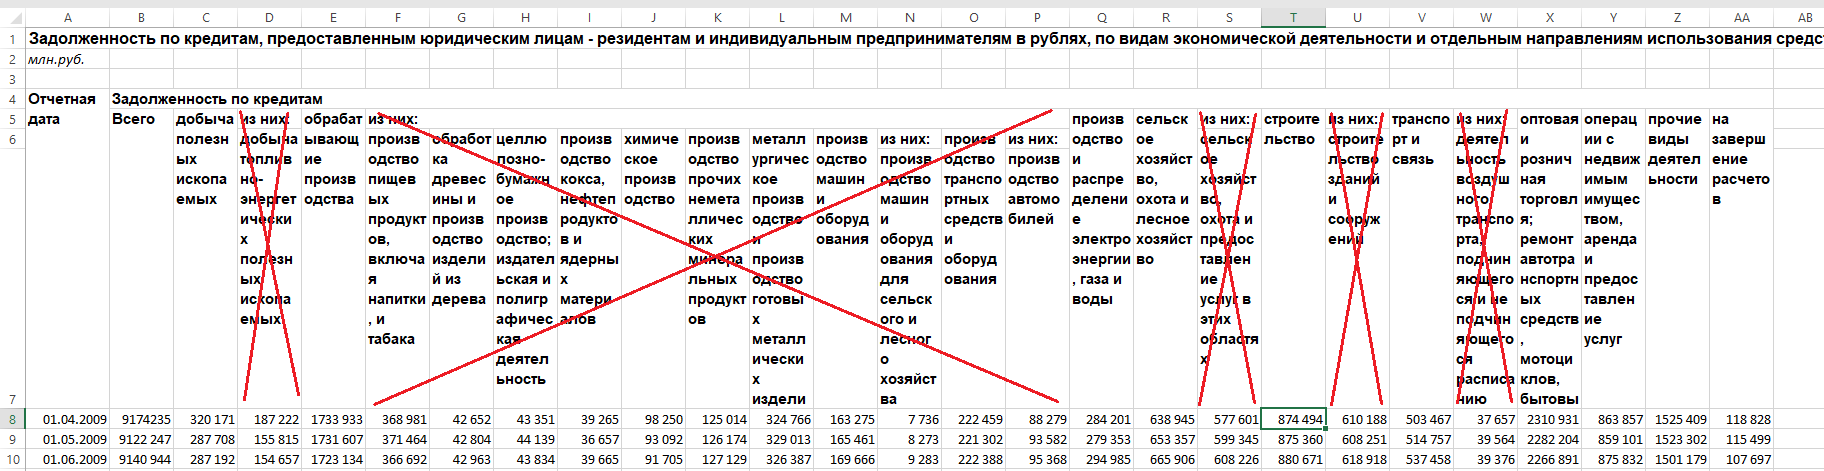

In [5]:
column_list = ['Unnamed: 2','Unnamed: 4','Unnamed: 16','Unnamed: 17','Unnamed: 19','Unnamed: 21','Unnamed: 23',
               'Unnamed: 24','Unnamed: 25','Unnamed: 26']

(data_before_feb_2019___[column_list].sum(axis=1)-data_before_feb_2019___['total debt in rub']<3).unique()

<BooleanArray>
[True]
Length: 1, dtype: boolean

In [6]:
# с точностью до 3 млн рублей колонка Всего содержит сумму задолженностей по всем видам экономической детельности
# проверили для одного датасета, для других подобную проверку делать не будем

In [7]:
data_before_feb_2019____ = data_before_feb_2019___.drop(data_before_feb_2019___.iloc[:, 2:], axis=1)


In [8]:
# добавим колонку из другого эксель с задолженностью в валюте и драг металлах
data_before_feb_2019_fx_met = pd.read_excel("302-06.xlsx", na_values=["NA"])
data_before_feb_2019_fx_met_ = data_before_feb_2019_fx_met.drop(data_before_feb_2019_fx_met.iloc[:, 2:], axis=1)


data_before_feb_2019_fx_met__ = data_before_feb_2019_fx_met_.iloc[6:]


In [9]:
data_before_feb_2019_fx_met___ = data_before_feb_2019_fx_met__.rename(columns={"Задолженность по кредитам, предоставленным юридическим лицам - резидентам и индивидуальным предпринимателям в иностранной валюте и драгоценных металлах, по видам экономической деятельности и отдельным направлениям использования средств": "date", "Unnamed: 1": "total debt in fx and met"})\
.reset_index(drop=True)

data_before_feb_2019_fx_met___['date'] = pd.to_datetime(data_before_feb_2019_fx_met___['date'])
data_before_feb_2019_fx_met___ = data_before_feb_2019_fx_met___.convert_dtypes() 

print((data_before_feb_2019_fx_met___['date']-data_before_feb_2019____['date']).unique()) # проверка, что даты совпадают


[0]


In [10]:
# добавим данные по сумме задолженности в рублях из остальных эксель
df3 = pd.read_excel("302-09.xlsx", na_values=["NA"])
df3 = ((df3.drop\
(df3.iloc[:, 2:], axis = 1)))
df3 = df3.iloc[6:]
df3 = df3.rename(columns={"Просроченная задолженность по кредитам, предоставленным юридическим лицам - резидентам и индивидуальным предпринимателям в рублях, по видам экономической деятельности и отдельным направлениям использования средств": "date", "Unnamed: 1": "overdue debt in rub"})
df3['date'] = pd.to_datetime(df3['date'])
df3 = df3.convert_dtypes().reset_index(drop=True) 
print((df3['date']-data_before_feb_2019____['date']).unique()) # проверка, что даты совпадают


[0]


In [11]:
# добавим данные по просроченной задолженности в рублях из остальных эксель
df4 = pd.read_excel("302-10.xlsx", na_values=["NA"])
df4 = ((df4.drop\
(df4.iloc[:, 2:], axis = 1)))
df4 = df4.iloc[6:]
df4 = df4.rename(columns={"Просроченная задолженность по кредитам, предоставленным юридическим лицам - резидентам и индивидуальным предпринимателям в иностранной валюте и драгоценных металлах, по видам экономической деятельности и отдельным направлениям использования средств *": "date", "Unnamed: 1": "overdue debt in fx and met"})
df4['date'] = pd.to_datetime(df4['date'])
df4 = df4.convert_dtypes().reset_index(drop=True) 
print((df4['date']-data_before_feb_2019____['date']).unique()) # проверка, что даты совпадают


[0]


In [12]:
# собираем все столбцы в один датасет до февраля 2019

data_before_feb_2019 = data_before_feb_2019____
ff1 = data_before_feb_2019.merge(data_before_feb_2019_fx_met___, how='left', left_on='date', right_on='date')
ff2 = ff1.merge(df3, how='left', left_on='date', right_on='date')
ff3 = ff2.merge(df4, how='left', left_on='date', right_on='date')
data_before_feb_2019 = ff3
data_before_feb_2019.head()
data_before_feb_2019.tail()

date  total debt in rub  total debt in fx and met  \
113 2018-09-01           24922210                   6894406   
114 2018-10-01           25067351                   6639954   
115 2018-11-01           25382809                   6523656   
116 2018-12-01           25623056                   6343322   
117 2019-01-01           25760819                   6467945   

     overdue debt in rub  overdue debt in fx and met  
113              1970915                      190116  
114              1973028                      177826  
115              1965442                      179193  
116              1961154                      188675  
117              1899307                      200299

In [13]:
# соберем и обработаем данные после февраля 2019 года

def get_df(excel_name,sheet_name,column_name):
    dff = pd.read_excel(excel_name,  sheet_name , na_values=["NA"]).T
    dff = ((dff.drop(dff.iloc[:, 2:], axis = 1)))
    dff = dff.iloc[1:]
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    return dff

af1 = get_df('01_02_A_Debt_corp_by_activity.xlsx','в рублях','total debt in rub')
af2 = get_df('01_02_A_Debt_corp_by_activity.xlsx','в инвалюте','total debt in fx and met')
af3 = get_df('01_02_A_Debt_corp_by_activity.xlsx','в т.ч. просроч. в рублях','overdue debt in rub')
af4 = get_df('01_02_A_Debt_corp_by_activity.xlsx','в т.ч.просроч. в инвалюте','overdue debt in fx and met')

# собираем все столбцы в один датасет после февраля 2019
data_after_feb_2019 = ((af1.merge(af2, how='left' ,on='date')).merge(af3, how='left', on='date')).merge(af4, how='left', on='date')
data_after_feb_2019.head()


date  total debt in rub  total debt in fx and met  \
0 2019-02-01           25728662                   5921454   
1 2019-03-01           25885238                   5794177   
2 2019-04-01           26209480                   5570405   
3 2019-05-01           26433363                   5453519   
4 2019-06-01           26513261                   5444738   

   overdue debt in rub  overdue debt in fx and met  
0              1949294                      215032  
1              2050020                      153793  
2              2039376                      194939  
3              2126326                      138931  
4              2154522                      179636

In [14]:
# таже у нас ПОСЛЕ февраля 2018 есть данные по ОКВЭД2
# пока соберем эти данные (только объем задолженности) в отдельный датафрейм и посмотрим как они соотносятся с данными, где разделение было только по общим видам
# экономической деятельтности

def get_df_okved(excel_name,sheet_name,column_name):
    dff = pd.read_excel(excel_name,  sheet_name , na_values=["NA"]).T
    dff = dff.iloc[1:]
    dff[dff.columns[1]] = dff.iloc[:, 1:].sum(axis=1)
    dff = ((dff.drop(dff.iloc[:, 2:], axis = 1)))
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    return dff

af1_okved = get_df_okved('01_02_C_Debt_corp_by_activity.xlsx','в рублях','total debt in rub')
af1_okved.tail()


date  total debt in rub
39 2021-05-01           31872495
40 2021-06-01           32387151
41 2021-07-01           33131339
42 2021-08-01           33873286
43 2021-09-01           34257998

In [15]:
# проверим какую долю занимают объем задолженности по ОКВЕД2 в объеме задолженности по видам эконом. деятельности
abs(af1_okved[af1_okved['date'] >= '2019-02-01']['total debt in rub'].reset_index(drop=True)\
-data_after_feb_2019['total debt in rub']).max()


6

In [16]:
# видим, что сумма задолженности по ОКВЭД2 полностью совпадает (с точностью до единиц миллионов)
# с суммой задолженности по видам экономической деятельности

# -> будем использовать только данные по видам экономической деятельности

In [17]:
# объединим данные до февраля 2019 и после февраля 2019 
data_on_debt = data_before_feb_2019.append(data_after_feb_2019, ignore_index=True)
data_on_debt


date  total debt in rub  total debt in fx and met  \
0   2009-04-01            9174235                   3822594   
1   2009-05-01            9122247                   3929850   
2   2009-06-01            9140944                   3706525   
3   2009-07-01            9063617                   3657555   
4   2009-08-01            9043354                   3674047   
..         ...                ...                       ...   
145 2021-05-01           31872493                   6558354   
146 2021-06-01           32387153                   6370082   
147 2021-07-01           33131339                   5989688   
148 2021-08-01           33873290                   6078275   
149 2021-09-01           34257994                   6327327   

     overdue debt in rub  overdue debt in fx and met  
0                 346769                       86872  
1                 380065                      121919  
2                 409667                      139514  
3                 428450                      144769  
4                 478269                      166054  
..                   ...                         ...  
145              2106846                      179546  
146              2185355                      113337  
147              2729296                      110214  
148              2652287                       96941  
149              2681390                       97794  

[150 rows x 5 columns]

In [18]:
# добавим значения уровня просроченной задолженности как = Просроченная / Задолженность по руб и ин.валюте\драг.металлам
level_of_debt_in_rub = data_on_debt['overdue debt in rub'] / data_on_debt['total debt in rub'] * 100
level_of_debt_in_fx_and_met = data_on_debt['overdue debt in fx and met'] / data_on_debt['total debt in fx and met'] * 100

data_on_level_of_debt = data_on_debt.copy()
data_on_level_of_debt['level_of_debt_in_rub_percent'] = level_of_debt_in_rub
data_on_level_of_debt['level_of_debt_in_fx_and_met_percent'] = level_of_debt_in_fx_and_met
data_on_level_of_debt


date  total debt in rub  total debt in fx and met  \
0   2009-04-01            9174235                   3822594   
1   2009-05-01            9122247                   3929850   
2   2009-06-01            9140944                   3706525   
3   2009-07-01            9063617                   3657555   
4   2009-08-01            9043354                   3674047   
..         ...                ...                       ...   
145 2021-05-01           31872493                   6558354   
146 2021-06-01           32387153                   6370082   
147 2021-07-01           33131339                   5989688   
148 2021-08-01           33873290                   6078275   
149 2021-09-01           34257994                   6327327   

     overdue debt in rub  overdue debt in fx and met  \
0                 346769                       86872   
1                 380065                      121919   
2                 409667                      139514   
3                 428450                      144769   
4                 478269                      166054   
..                   ...                         ...   
145              2106846                      179546   
146              2185355                      113337   
147              2729296                      110214   
148              2652287                       96941   
149              2681390                       97794   

     level_of_debt_in_rub_percent  level_of_debt_in_fx_and_met_percent  
0                        3.779814                             2.272593  
1                        4.166353                             3.102383  
2                        4.481671                             3.764011  
3                        4.727141                             3.958081  
4                        5.288624                             4.519648  
..                            ...                                  ...  
145                      6.610233                             2.737669  
146                      6.747598                             1.779208  
147                      8.237808                             1.840062  
148                      7.830025                             1.594877  
149                      7.827049                             1.545582  

[150 rows x 7 columns]

In [19]:
# также проверим корреляцию между этими двумя видами задолженности
data_on_level_of_debt.corr().style.background_gradient(cmap='coolwarm')


In [20]:
# также проверим на корреляцию процентные измененения по обоим видам задолженности 
changes = (data_on_level_of_debt.drop(['date'], axis=1)).pct_change().dropna().corr().style.background_gradient(cmap='coolwarm')
changes


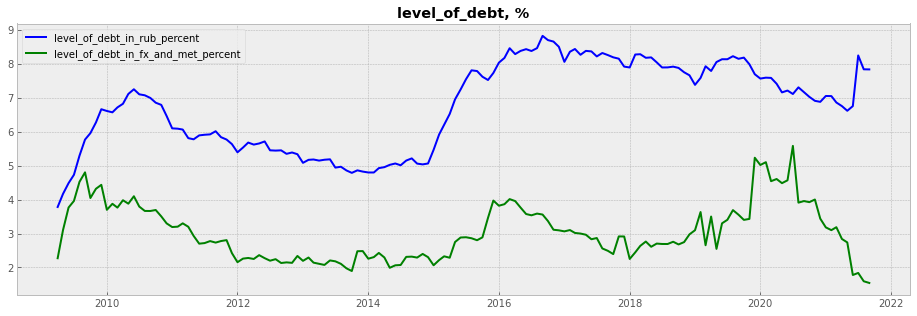

In [21]:
# посмотрим на графики и чтобы визуально понять как между собой соотносятся долги по руб и по валюте\металлам
fig = plt.figure(figsize=(16, 5))
plt.plot(data_on_level_of_debt['date'].tolist() ,data_on_level_of_debt['level_of_debt_in_rub_percent'].tolist()  ,'b')
plt.plot(data_on_level_of_debt['date'].tolist() ,data_on_level_of_debt['level_of_debt_in_fx_and_met_percent'].tolist()  ,'g')
plt.legend(['level_of_debt_in_rub_percent','level_of_debt_in_fx_and_met_percent'])
plt.title("level_of_debt, %", weight="bold")
plt.show()


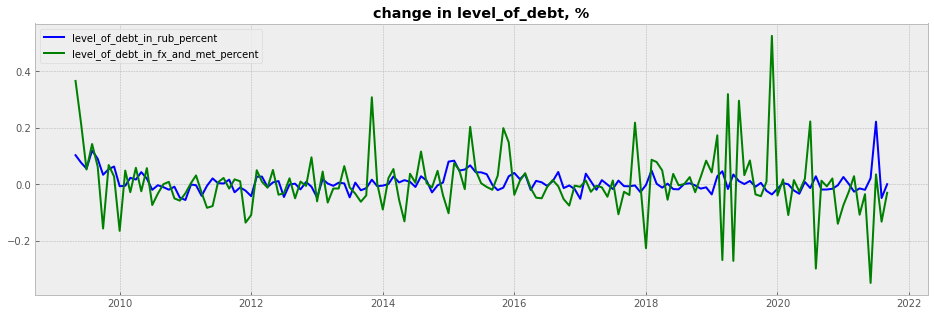

In [22]:
fig = plt.figure(figsize=(16, 5))
plt.plot(data_on_level_of_debt['date'].drop(0).tolist() ,data_on_level_of_debt['level_of_debt_in_rub_percent'].pct_change().dropna().tolist()  ,'b')
plt.plot(data_on_level_of_debt['date'].drop(0).tolist() ,data_on_level_of_debt['level_of_debt_in_fx_and_met_percent'].pct_change().dropna().tolist()  ,'g')
plt.legend(['level_of_debt_in_rub_percent','level_of_debt_in_fx_and_met_percent'])
plt.title("change in level_of_debt, %", weight="bold")
plt.show()


In [23]:
# видим, что корреляция в процентном изменении (в динамике) не прослеживается между двумя видами задолженности 
# вероятно разные факторы на них влияют, скорее всего валютный курс - произодит переоценка уровеня задолженности в валюте
# видится, что складывать эти два вида задолженности в одну общую задолженность некорректно
# -> в модели будем использовать только зажолженность в рублях

data_on_debt_result = data_on_level_of_debt.drop(['total debt in fx and met','overdue debt in fx and met','level_of_debt_in_fx_and_met_percent'], axis=1)
data_on_debt_result


date  total debt in rub  overdue debt in rub  \
0   2009-04-01            9174235               346769   
1   2009-05-01            9122247               380065   
2   2009-06-01            9140944               409667   
3   2009-07-01            9063617               428450   
4   2009-08-01            9043354               478269   
..         ...                ...                  ...   
145 2021-05-01           31872493              2106846   
146 2021-06-01           32387153              2185355   
147 2021-07-01           33131339              2729296   
148 2021-08-01           33873290              2652287   
149 2021-09-01           34257994              2681390   

     level_of_debt_in_rub_percent  
0                        3.779814  
1                        4.166353  
2                        4.481671  
3                        4.727141  
4                        5.288624  
..                            ...  
145                      6.610233  
146                      6.747598  
147                      8.237808  
148                      7.830025  
149                      7.827049  

[150 rows x 4 columns]

### Подготовим макроданные 

Поиск макро статистики

In [24]:
# ВВП
# Ссылка 1: ВВП кварталы (с 1995 г.) | 'VVP_kvartal_s_1995.xls' | https://rosstat.gov.ru/storage/mediabank/VVP_kvartal_s_1995.xls
    
# ИПЦ
# Ссылка 1: Индексы потребительских цен на товары и услуги | data.xls | https://www.fedstat.ru/indicator/31074
# Ссылка 2: Индексы потребительских цен на товары и услуги по Российской Федерации с 2001г. | cpi.xlsx | https://www.gks.ru/bgd/free/b00_24/IssWWW.exe/Stg/d000/I000650R.HTM
        
# Brent (in USD)
# Brent Crude Oil Last Day Financ (BZ=F) | import yfinance as yf | https://finance.yahoo.com/quote/BZ=F/?fr=sycsrp_catchall
# Urals (in USD)
# https://www.profinance.ru/chart/urals/
# | urals.xlsx |
# https://ru.investing.com/commodities/crude-oil-urals-spot-futures

# USDRUB 
# USD/RUB (RUB=X) | import yfinance as yf | https://finance.yahoo.com/quote/RUB=X?p=RUB=X&.tsrc=fin-srch
# или
# База данных по курсам валют | RC_F01_04_2008_T04_11_2021.xlsx | https://www.cbr.ru/currency_base/

# Ключевая ставка ЦБ РФ
# Ключевая ставка Банка России | key_rate.xlsx | https://www.cbr.ru/hd_base/KeyRate/

# Уровень безработицы
# https://rosstat.gov.ru/folder/313/document/80528
# https://gks.ru/bgd/free/B04_03/IssWWW.exe/Stg/d02/38.htm
# https://1prime.ru/state_regulation/20210422/833518224.html
# https://rosstat.gov.ru/storage/mediabank/Trud_2019.pdf
# https://rosstat.gov.ru/storage/mediabank/situaz.pdf
# https://ruxpert.ru/Статистика:Уровень_безработицы_в_России

# Уровень безработицы (по методологии МОТ) | unemployment.xlsx | https://fedstat.ru/indicator/43062

In [25]:
# загрузим данные по ВВП - в текущих ценах
from datetime import date
from calendar import monthrange

# !pip install xlrd

def get_vvp_data(before_2011, excel_name='VVP_kvartal_s_1995.xls'):
    # загрузка данных после 2011 года
    column_name = 'vvp in mlrd rub'
    if before_2011:
        sheet_name = '1'
        row_index = 48
        years_range = range(2007, 2012)
    else:
        sheet_name = '2'
        row_index = 4
        years_range = range(2012, 2022)
        
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).T
    dff = dff.iloc[row_index:]
        
    dff = ((dff.drop(dff.iloc[:, 4:], axis=1)))
    dff = dff.drop([0,1], axis=1)
    dates = []
    for year in years_range:
        for quarter in range(1, 5):
            last_month_of_quarter = 3 * quarter
            date_of_last_day_of_quarter = date(year, last_month_of_quarter, monthrange(year, last_month_of_quarter)[1])
            dates.append(date_of_last_day_of_quarter)
    
    dff[2] = dates
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().dropna().reset_index(drop=True)
    return dff

vvp1 = get_vvp_data(before_2011=True)
vvp2 = get_vvp_data(before_2011=False)

vvp_result = vvp1.append(vvp2).reset_index(drop=True)
vvp_result.tail()



date  vvp in mlrd rub
53 2020-06-30      23661.92473
54 2020-09-30     27580.834389
55 2020-12-31     30967.986629
56 2021-03-31     26770.985219
57 2021-06-30     30853.087056

In [26]:
# объединим поквартально данные по задолженностям и ВВП
# занные по задолженносям на начало месяца, что то же самое что и на конец предыдущего месяца -> сдвинем даты на один день назад
pre_quarters_dates = data_on_debt_result['date'] + timedelta(days=-1)
pre_quarters_dates


0     2009-03-31
1     2009-04-30
2     2009-05-31
3     2009-06-30
4     2009-07-31
         ...    
145   2021-04-30
146   2021-05-31
147   2021-06-30
148   2021-07-31
149   2021-08-31
Name: date, Length: 150, dtype: datetime64[ns]

In [27]:
# заметим, xто для суммирования просроченностей поквартально нужно удалить строки с датами 2009-03-31, 2021-07-31 и 2021-08-31
# так как в кварталах для данных месяцев будет не хватать данных по одному или двум месяцам
data_on_debt_result_ = data_on_debt_result.drop(['level_of_debt_in_rub_percent'], axis=1)
data_on_debt_result_['date'] = pre_quarters_dates
data_on_debt_result_ = data_on_debt_result_.iloc[1:-2 , :].reset_index(drop=True) 
data_on_debt_result_


date  total debt in rub  overdue debt in rub
0   2009-04-30            9122247               380065
1   2009-05-31            9140944               409667
2   2009-06-30            9063617               428450
3   2009-07-31            9043354               478269
4   2009-08-31            9105925               524767
..         ...                ...                  ...
142 2021-02-28           30843854              2113886
143 2021-03-31           31216845              2106358
144 2021-04-30           31872493              2106846
145 2021-05-31           32387153              2185355
146 2021-06-30           33131339              2729296

[147 rows x 3 columns]

In [28]:
N = 3

col12 = data_on_debt_result_.groupby(np.arange(len(data_on_debt_result_.index))//N, axis=0).sum().reset_index(drop=True) 
col0 = data_on_debt_result_.iloc[2::3, :].reset_index(drop=True) 

column_names = ["date", "total debt in rub", "overdue debt in rub"]
debt_quarter_result = pd.DataFrame(columns = column_names)

debt_quarter_result['date'] = col0['date']
debt_quarter_result['total debt in rub'] = col12['total debt in rub']
debt_quarter_result['overdue debt in rub'] = col12['overdue debt in rub']

level_of_debt_in_rub = debt_quarter_result['overdue debt in rub'] / debt_quarter_result['total debt in rub'] * 100
debt_quarter_result['level_of_debt_in_rub_percent'] = level_of_debt_in_rub
debt_quarter_result = debt_quarter_result.reset_index(drop=True)

debt_quarter_result.head()


date  total debt in rub  overdue debt in rub  \
0 2009-06-30           27326808              1218182   
1 2009-09-30           27374878              1552190   
2 2009-12-31           27417885              1784432   
3 2010-03-31           27297040              1828036   
4 2010-06-30           28084768              2007236   

   level_of_debt_in_rub_percent  
0                      4.457828  
1                      5.670126  
2                      6.508277  
3                      6.696829  
4                      7.147063

In [29]:
# объединяем данные по ВВП и задолженностям
debt_vvp = debt_quarter_result.merge(vvp_result, how='left', left_on='date', right_on='date')
debt_vvp.head()


date  total debt in rub  overdue debt in rub  \
0 2009-06-30           27326808              1218182   
1 2009-09-30           27374878              1552190   
2 2009-12-31           27417885              1784432   
3 2010-03-31           27297040              1828036   
4 2010-06-30           28084768              2007236   

   level_of_debt_in_rub_percent  vvp in mlrd rub  
0                      4.457828      9244.828821  
1                      5.670126     10411.333956  
2                      6.508277     10816.423016  
3                      6.696829      9995.758259  
4                      7.147063     10977.035261

In [30]:
# добавим ИПЦ
def get_cpi(excel_name, sheet_name, column_name):
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).reset_index(drop=True)
    dff = dff.drop(dff.iloc[:, 2:], axis = 1).reset_index(drop=True)
    dff = dff.iloc[1::3, :].reset_index(drop=True)
    dates = []
    for year in range(2007, 2022):
        for quarter in range(1, 5):
            last_month_of_quarter = 3 * quarter
            date_of_last_day_of_quarter = date(year, last_month_of_quarter, monthrange(year, last_month_of_quarter)[1])
            dates.append(date_of_last_day_of_quarter)
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = dates[:-1]
    dff['date'] = pd.to_datetime(dff['date'])
    dff[column_name] = pd.to_numeric(dff[column_name], errors='coerce')
    return dff

cpi = get_cpi('cpi.xlsx','cpi','cpi in percent')
cpi.head()
cpi.tail(10)

date  cpi in percent
49 2019-06-30           589.0
50 2019-09-30           587.8
51 2019-12-31           592.3
52 2020-03-31           599.9
53 2020-06-30           607.9
54 2020-09-30           609.4
55 2020-12-31           621.4
56 2021-03-31           634.6
57 2021-06-30           647.4
58 2021-09-30           654.4

In [31]:
# len(cpi['cpi in percent'])==(2020-2007+1)*4+3
# cpi.isna()

In [32]:
# объединяем данные по cpi и основным датасетом
debt_vvp_cpi = debt_vvp.merge(cpi, how='left', left_on='date', right_on='date')
print('Number of NA =', debt_vvp_cpi.isna().sum().sum())
debt_vvp_cpi.head()


Number of NA = 0


date  total debt in rub  overdue debt in rub  \
0 2009-06-30           27326808              1218182   
1 2009-09-30           27374878              1552190   
2 2009-12-31           27417885              1784432   
3 2010-03-31           27297040              1828036   
4 2010-06-30           28084768              2007236   

   level_of_debt_in_rub_percent  vvp in mlrd rub  cpi in percent  
0                      4.457828      9244.828821           306.0  
1                      5.670126     10411.333956           307.8  
2                      6.508277     10816.423016           310.0  
3                      6.696829      9995.758259           319.8  
4                      7.147063     10977.035261           323.6

In [33]:
# данные по ценам Brent не будем использовать так как по ним нет прогнозов от официальных сструктур России
# данные по ценам на нефть Urals не будем добавлять так как в открытых источниках доступны цены только с 2014-н.в.

In [34]:
# добавим USDRUB
def get_usd(excel_name, sheet_name, column_name):
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).reset_index(drop=True)
    dff = dff.drop(['nominal','cdx'], axis=1).reset_index(drop=True)
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    return dff

usd = get_usd('RC_F01_04_2008_T04_11_2021.xlsx','RC','USDRUB in rub')
# заполним пропущенные даты (выходные дни например) данными из первого следующего рабочего дня
usd = usd.set_index('date').sort_index()
all_days = pd.date_range(usd.index.min(), usd.index.max(), freq='D')
usd = usd.reindex(index=all_days).fillna(method='bfill')
usd = usd.reset_index().rename({'index':'date'}, axis = 'columns').reset_index(drop=True)

print('Number of NA =', usd.isna().sum().sum())
usd.head()


Number of NA = 0


date  USDRUB in rub
0 2008-04-01        23.5027
1 2008-04-02        23.5799
2 2008-04-03        23.6706
3 2008-04-04        23.6153
4 2008-04-05        23.5982

In [35]:
# объединяем данные по USDRUB и основным датасетом
debt_vvp_cpi_usd = debt_vvp_cpi.merge(usd, how='left', left_on='date', right_on='date')
print('Number of NA =', debt_vvp_cpi_usd.isna().sum().sum())
debt_vvp_cpi_usd.head()


Number of NA = 0


date  total debt in rub  overdue debt in rub  \
0 2009-06-30           27326808              1218182   
1 2009-09-30           27374878              1552190   
2 2009-12-31           27417885              1784432   
3 2010-03-31           27297040              1828036   
4 2010-06-30           28084768              2007236   

   level_of_debt_in_rub_percent  vvp in mlrd rub  cpi in percent  \
0                      4.457828      9244.828821           306.0   
1                      5.670126     10411.333956           307.8   
2                      6.508277     10816.423016           310.0   
3                      6.696829      9995.758259           319.8   
4                      7.147063     10977.035261           323.6   

   USDRUB in rub  
0        31.2904  
1        30.0922  
2        30.2442  
3        29.3638  
4        31.1954

In [36]:
# добавим Ключевую ставку ЦБ РФ
def get_rate(excel_name, sheet_name, column_name):
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).reset_index(drop=True)
    dff = dff.iloc[1:].reset_index(drop=True)
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    return dff

rate = get_rate('key_rate.xlsx', 'Лист1', 'rate in percent')
# заполним пропущенные даты (выходные дни например) данными из первого следующего рабочего дня
rate = rate.set_index('date').sort_index()
all_days = pd.date_range(rate.index.min(), rate.index.max(), freq='D')
rate = rate.reindex(index=all_days).fillna(method='bfill')
rate = rate.reset_index().rename({'index':'date'}, axis = 'columns').reset_index(drop=True)
print('Number of NA =', rate.isna().sum().sum())
rate


Number of NA = 0


date  rate in percent
0    2013-09-17              5.5
1    2013-09-18              5.5
2    2013-09-19              5.5
3    2013-09-20              5.5
4    2013-09-21              5.5
...         ...              ...
2967 2021-11-01              7.5
2968 2021-11-02              7.5
2969 2021-11-03              7.5
2970 2021-11-04              7.5
2971 2021-11-05              7.5

[2972 rows x 2 columns]

In [37]:
# объединяем данные по ключевой ставке с основным датасетом
debt_vvp_cpi_usd_rate = debt_vvp_cpi_usd.merge(rate, how='left', left_on='date', right_on='date')
print('Number of NA =', debt_vvp_cpi_usd_rate.isna().sum().sum())
debt_vvp_cpi_usd_rate.head()


Number of NA = 17


date  total debt in rub  overdue debt in rub  \
0 2009-06-30           27326808              1218182   
1 2009-09-30           27374878              1552190   
2 2009-12-31           27417885              1784432   
3 2010-03-31           27297040              1828036   
4 2010-06-30           28084768              2007236   

   level_of_debt_in_rub_percent  vvp in mlrd rub  cpi in percent  \
0                      4.457828      9244.828821           306.0   
1                      5.670126     10411.333956           307.8   
2                      6.508277     10816.423016           310.0   
3                      6.696829      9995.758259           319.8   
4                      7.147063     10977.035261           323.6   

   USDRUB in rub  rate in percent  
0        31.2904             <NA>  
1        30.0922             <NA>  
2        30.2442             <NA>  
3        29.3638             <NA>  
4        31.1954             <NA>

In [38]:
# пропущенные значения - это нормально, так как данные по ключеваой ставке имеются только с 2013 года
# если фактор ключевой ставки существенен, то можно анализировать с 2013 года, если не существенен, то не сипользовать этот фактор

In [39]:
# добавим уровень безработицы
def get_unmpl(excel_name, sheet_name, column_name):
    # Подготавливает данные по безработице    
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).T.reset_index(drop=True)
    dff = dff.iloc[5:].reset_index(drop=True)
    dff = dff[~dff[2].str.contains("значение")]
    
    dff = dff.drop([0,1,2], axis=1).reset_index(drop=True)
    dates = []
    for year in range(2010, 2022):
        for quarter in range(1, 5):
            last_month_of_quarter = 3 * quarter
            date_of_last_day_of_quarter = date(year, last_month_of_quarter, monthrange(year, last_month_of_quarter)[1])
            dates.append(date_of_last_day_of_quarter)
    dff = dff.rename(columns={dff.columns[0]: "date", dff.columns[1]: column_name})
    dff['date'] = dates[:-2]
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    
    column_names = ["date", column_name]
    dff0809 = pd.DataFrame(columns = column_names)
    dates = []
    for year in range(2008, 2010):
        for quarter in range(1, 5):
            last_month_of_quarter = 3 * quarter
            date_of_last_day_of_quarter = date(year, last_month_of_quarter, monthrange(year, last_month_of_quarter)[1])
            dates.append(date_of_last_day_of_quarter)
    dff0809['date'] = dates
    dff0809['date'] = pd.to_datetime(dff0809['date'])
    
    dff0809[column_name] = [6.2 for i in range (4)] + [8.3 for i in range (4)]
    
    dff0809 = dff0809.convert_dtypes().reset_index(drop=True) 
        
    dff = dff0809.append(dff).reset_index(drop=True)
    
    return dff

unmpl = get_unmpl('unemployment.xls','Данные','unemployment rate in percent')
print('Number of NA =', unmpl.isna().sum().sum())
unmpl.tail()


Number of NA = 0


date  unemployment rate in percent
49 2020-06-30                           6.0
50 2020-09-30                           6.4
51 2020-12-31                           6.1
52 2021-03-31                           5.6
53 2021-06-30                           4.9

In [40]:
# объединяем данные по уровню безработицы с основным датасетом
debt_vvp_cpi_usd_rate_unmpl = debt_vvp_cpi_usd_rate.merge(unmpl, how='left', left_on='date', right_on='date')
print('Number of NA =' ,debt_vvp_cpi_usd_rate_unmpl.isna().sum().sum())
debt_vvp_cpi_usd_rate_unmpl.tail()
# debt_vvp_cpi_usd_rate_unmpl

Number of NA = 17


date  total debt in rub  overdue debt in rub  \
44 2020-06-30           87377953              6250226   
45 2020-09-30           89739106              6423184   
46 2020-12-31           92294555              6405230   
47 2021-03-31           92736863              6380588   
48 2021-06-30           97390985              7021497   

    level_of_debt_in_rub_percent  vvp in mlrd rub  cpi in percent  \
44                      7.153093      23661.92473           607.9   
45                       7.15762     27580.834389           609.4   
46                      6.939987     30967.986629           621.4   
47                      6.880315     26770.985219           634.6   
48                      7.209596     30853.087056           647.4   

    USDRUB in rub  rate in percent  unemployment rate in percent  
44        69.9513              4.5                           6.0  
45        79.6845             4.25                           6.4  
46        73.8757             4.25                           6.1  
47        75.7023              4.5                           5.6  
48        72.3723              5.5                           4.9

In [41]:
# добавим цены на нефть Urals
def get_urals(excel_name, sheet_name, column_name):
    dff = pd.read_excel(excel_name, sheet_name, na_values=["NA"]).reset_index(drop=True)
    dff = dff[['Close', 'Время']]
    dff = dff.reset_index(drop=True)
    dff = dff.rename(columns={dff.columns[0]: column_name, dff.columns[1]: "date"})
    dff['date'] = pd.to_datetime(dff['date'])
    dff = dff.convert_dtypes().reset_index(drop=True) 
    return dff


urals = get_urals('urals.xlsx', 'Лист1', 'urals_close')
# заполним пропущенные даты (выходные дни например) данными из первого следующего рабочего дня
urals = urals.set_index('date').sort_index()
all_days = pd.date_range(urals.index.min(), urals.index.max(), freq='D')
urals = urals.reindex(index=all_days).fillna(method='bfill')
urals = urals.reset_index().rename({'index':'date'}, axis = 'columns').reset_index(drop=True)
print('Number of NA =', urals.isna().sum().sum())
urals


Number of NA = 0


date  urals_close
0    2015-03-22        53.84
1    2015-03-23        53.57
2    2015-03-24        54.64
3    2015-03-25        57.14
4    2015-03-26         54.4
...         ...          ...
2416 2021-11-01        82.64
2417 2021-11-02        82.03
2418 2021-11-03        79.41
2419 2021-11-04         78.8
2420 2021-11-05        80.44

[2421 rows x 2 columns]

In [42]:
urals['urals_close']

0       53.84
1       53.57
2       54.64
3       57.14
4        54.4
        ...  
2416    82.64
2417    82.03
2418    79.41
2419     78.8
2420    80.44
Name: urals_close, Length: 2421, dtype: Float64

In [43]:
# объединяем данные по по ценам на нефть Urals с основным датасетом
debt_vvp_cpi_usd_rate_unmpl_urals = debt_vvp_cpi_usd_rate_unmpl.merge(urals, how='left', left_on='date', right_on='date')
print('Number of NA =' ,debt_vvp_cpi_usd_rate_unmpl_urals.isna().sum().sum())
debt_vvp_cpi_usd_rate_unmpl_urals.tail()
# debt_vvp_cpi_usd_rate_unmpl

Number of NA = 40


date  total debt in rub  overdue debt in rub  \
44 2020-06-30           87377953              6250226   
45 2020-09-30           89739106              6423184   
46 2020-12-31           92294555              6405230   
47 2021-03-31           92736863              6380588   
48 2021-06-30           97390985              7021497   

    level_of_debt_in_rub_percent  vvp in mlrd rub  cpi in percent  \
44                      7.153093      23661.92473           607.9   
45                       7.15762     27580.834389           609.4   
46                      6.939987     30967.986629           621.4   
47                      6.880315     26770.985219           634.6   
48                      7.209596     30853.087056           647.4   

    USDRUB in rub  rate in percent  unemployment rate in percent  urals_close  
44        69.9513              4.5                           6.0        43.55  
45        79.6845             4.25                           6.4        40.92  
46        73.8757             4.25                           6.1        50.85  
47        75.7023              4.5                           5.6        60.56  
48        72.3723              5.5                           4.9        74.38

### Поиск прогнозов макро статистики

In [44]:
# ВВП
# Банк России: https://cbr.ru/statistics/ddkp/mo_br/
# https://cbr.ru/Collection/Collection/File/38986/forecast_211022.pdf
# Минэкономразвития: https://www.economy.gov.ru/material/file/d7f5f5dea44bda4c30d42aac04cc1fca/prognoz_socialno_ekonom_razvitiya_rf_2022-2024.pdf
    
# ИПЦ
# Банк России: https://cbr.ru/statistics/ddkp/mo_br/
# https://cbr.ru/Collection/Collection/File/38986/forecast_211022.pdf

# Минэкономразвития: https://www.economy.gov.ru/material/file/d7f5f5dea44bda4c30d42aac04cc1fca/prognoz_socialno_ekonom_razvitiya_rf_2022-2024.pdf


# Brent (in USD)
# Brent Crude Oil Last Day Financ (BZ=F) | import yfinance as yf | https://finance.yahoo.com/quote/BZ=F/?fr=sycsrp_catchall
# Минэнерго США повысило прогноз цены Brent на 2021 год на 4% | https://tass.ru/ekonomika/12656365
# Urals (in USD)
# Минэкономразвития: https://www.economy.gov.ru/material/file/d7f5f5dea44bda4c30d42aac04cc1fca/prognoz_socialno_ekonom_razvitiya_rf_2022-2024.pdf


# USDRUB 
# Банк России: https://cbr.ru/statistics/ddkp/mo_br/
# https://cbr.ru/Collection/Collection/File/38986/forecast_211022.pdf
# Минэкономразвития: https://www.economy.gov.ru/material/file/d7f5f5dea44bda4c30d42aac04cc1fca/prognoz_socialno_ekonom_razvitiya_rf_2022-2024.pdf


# Ключевая ставка ЦБ РФ
# Банк России: https://cbr.ru/statistics/ddkp/mo_br/
# https://cbr.ru/Collection/Collection/File/38986/forecast_211022.pdf


# Уровень безработицы
# Минэкономразвития: https://www.economy.gov.ru/material/file/d7f5f5dea44bda4c30d42aac04cc1fca/prognoz_socialno_ekonom_razvitiya_rf_2022-2024.pdf

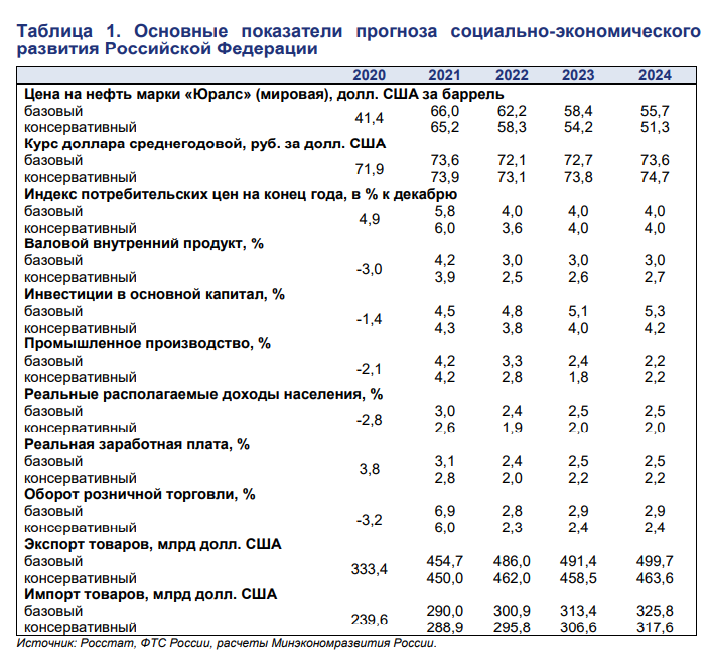

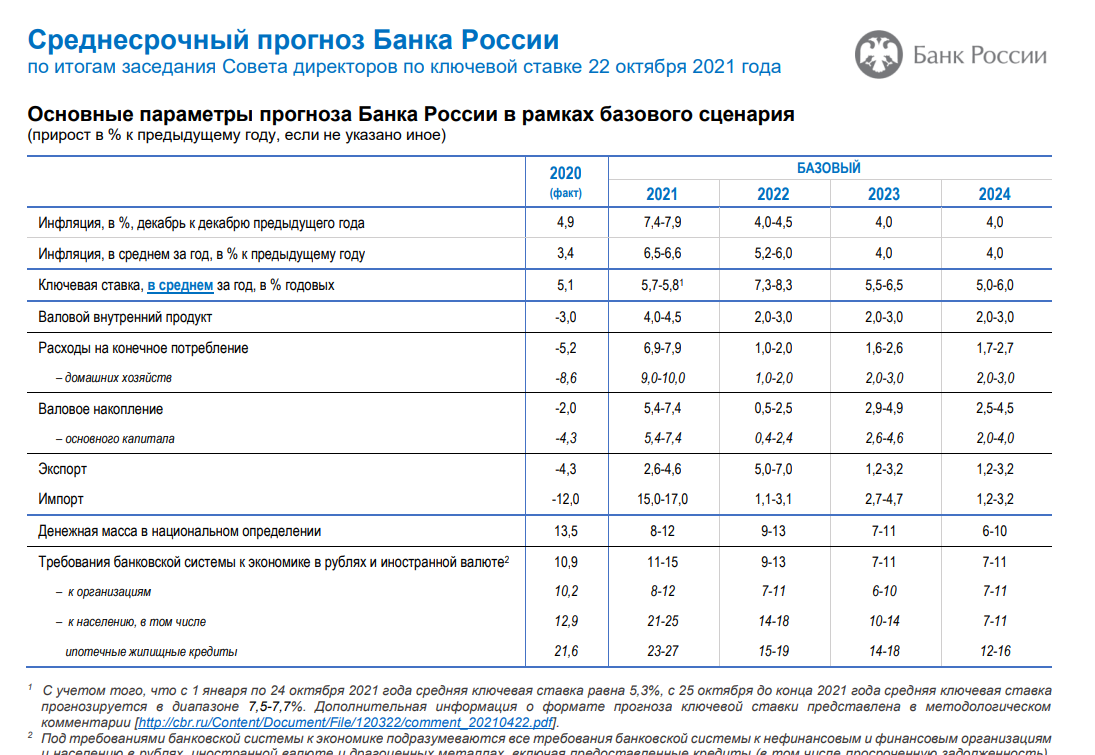

Данные для прогнозирования были собраны вручную. Загрузка данных будет выполнена непосредственно перед использованием

# Неделя 2

# Проверка факторов на стационарность

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import copy
import seaborn as sn
import scipy

Напишем функцию для проверку временного ряда на стационарность при помощи теста Дики-Фуллера, принимающую в качестве аргументов данные временного ряда и значение уровня значимости

In [46]:
#ts - временной ряд в DataFrame; level_of_sign - строка вида "_%", где вместо _ желаемый уровень значимости
def is_stationary(ts, level_of_sign):
    test = sm.tsa.adfuller(ts)
    #test[0] - test statistic
    #test[4] - critical values
    if test[0] > test[4][level_of_sign]: 
        return False  #не стационарен
    else:
        return True   #стационарен

In [47]:
alpha = "5%" #уровень значимости

In [48]:
# history_df - датафрейм с временными рядами макрофакторов, целевой переменнной и модификаций макрофакторов
# Правила формирования модификаций - log, diff, pct_change, log_diff и их сдвиги (лаги) до 3
# Так же добавлены варианты ВВП, ИЦП и целевой переменной без сезонности
history_df = copy.deepcopy(debt_vvp_cpi_usd_rate_unmpl_urals)
history_df.rename(columns = {'vvp in mlrd rub': 'vvp', 'cpi in percent': 'cpi', 'USDRUB in rub': 'USDRUB',
                             'rate in percent': 'rate', 'unemployment rate in percent': 'unemployment', 
                             'urals_close': 'urals'}, inplace=True)
history_df.set_index(history_df['date'], drop=True, inplace=True)


Посмотрим повнимательнее на удаление сезонности из ряда на примере ВВП

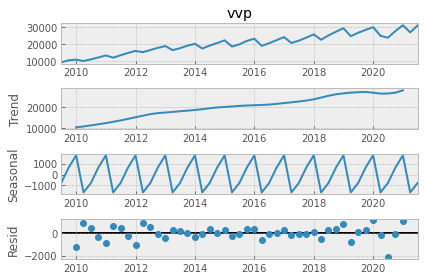

In [49]:
decomposition = sm.tsa.seasonal_decompose(history_df['vvp'], model='additive')
fig = decomposition.plot()
plt.show()
# результаты декомпозиции

In [50]:
season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
for temp_date, value in decomposition.seasonal.items():
    season_shift[temp_date.month] = value
history_df['vvp_season'] = history_df[['date', 'vvp']].apply(
    lambda x: x['vvp'] - season_shift[x['date'].month], axis=1)


Сравним ряды

<AxesSubplot:xlabel='date'>

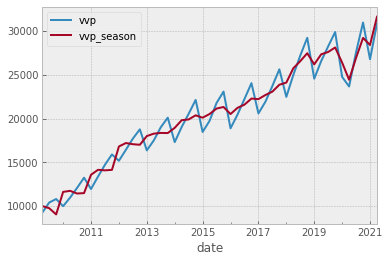

In [51]:
history_df[['vvp', 'vvp_season']].plot()

Видно, что ряд стал заметно более гладкий

In [52]:
# Добавим ряды без сезонности для ИЦП и целевой переменной
for column in ['cpi', 'level_of_debt_in_rub_percent']:
    decomposition = sm.tsa.seasonal_decompose(history_df[column], model='additive')
    season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
    for temp_date, value in decomposition.seasonal.items():
        season_shift[temp_date.month] = value
    history_df['{}_season'.format(column)] = history_df[['date', column]].apply(
        lambda x: x[column] - season_shift[x['date'].month], axis=1)


In [53]:
pure_cols = ['level_of_debt_in_rub_percent','level_of_debt_in_rub_percent_season', 'vvp', 'vvp_season', 'cpi', 'cpi_season', 'USDRUB', 'rate', 
             'unemployment', 'urals']


for col in pure_cols:
    history_df[col + '_diff'] = history_df[col].diff()
#     history_df[col + '_log_yt_yt_1'] = np.log(history_df[col + '_diff'])
    if col != 'level_of_debt_in_rub_percent':
        history_df[col + '_log'] = np.log(history_df[col])
        history_df[col + '_pct'] = history_df[col].pct_change() 
        history_df[col + '_log_diff'] = history_df[col + '_log'] - history_df[col + '_log'].shift(1)       
        for lag in range(1, 5):
            history_df[col+ '_{}'.format(lag)] = history_df[col].shift(lag)
            history_df[col + '_log_{}'.format(lag)] = history_df[col + '_log'].shift(lag) 
            history_df[col + '_diff_{}'.format(lag)] = history_df[col + '_diff'].shift(lag) 
            history_df[col + '_pct_{}'.format(lag)] = history_df[col + '_pct'].shift(lag) 
            history_df[col + '_log_diff_{}'.format(lag)] = history_df[col + '_log_diff'].shift(lag)
history_df['level_of_debt_in_rub_percent_season_log_yt_yt_1'] = np.log(history_df['level_of_debt_in_rub_percent_season_diff'])            
        
# history_df.tail()


In [54]:
history_df.columns

Index(['date', 'total debt in rub', 'overdue debt in rub',
       'level_of_debt_in_rub_percent', 'vvp', 'cpi', 'USDRUB', 'rate',
       'unemployment', 'urals',
       ...
       'urals_log_3', 'urals_diff_3', 'urals_pct_3', 'urals_log_diff_3',
       'urals_4', 'urals_log_4', 'urals_diff_4', 'urals_pct_4',
       'urals_log_diff_4', 'level_of_debt_in_rub_percent_season_log_yt_yt_1'],
      dtype='object', length=231)

In [55]:
# history_df['level_of_debt_in_rub_percent_season_diff']

#### Временной ряд уровня просроченной задолженности в рублях

In [56]:
def show_and_check_series(temp_series, title):
    temp_series.dropna(inplace=True)
    fig = plt.figure(figsize=(16, 5))
    temp_series.plot()
    plt.title(title, weight="bold")
    plt.show()
    if is_stationary(temp_series, alpha):
        print('Нет единичных корней, ряд стационарен')
    else:
        print('Есть единичные корни, ряд не стационарен')


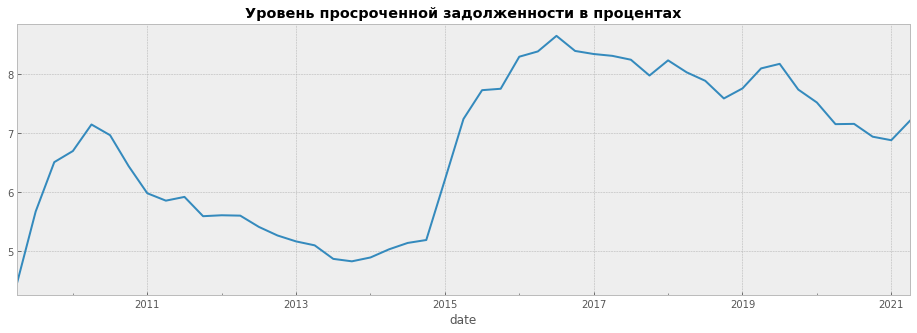

Есть единичные корни, ряд не стационарен


In [57]:
show_and_check_series(history_df['level_of_debt_in_rub_percent'],
                      'Уровень просроченной задолженности в процентах')

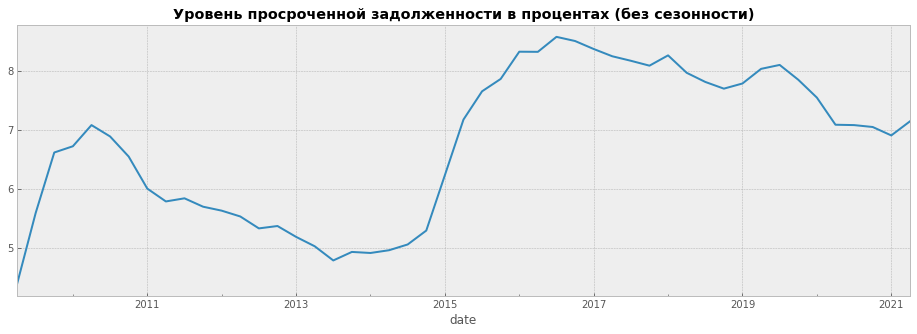

Есть единичные корни, ряд не стационарен


In [58]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season'],
                      'Уровень просроченной задолженности в процентах (без сезонности)')

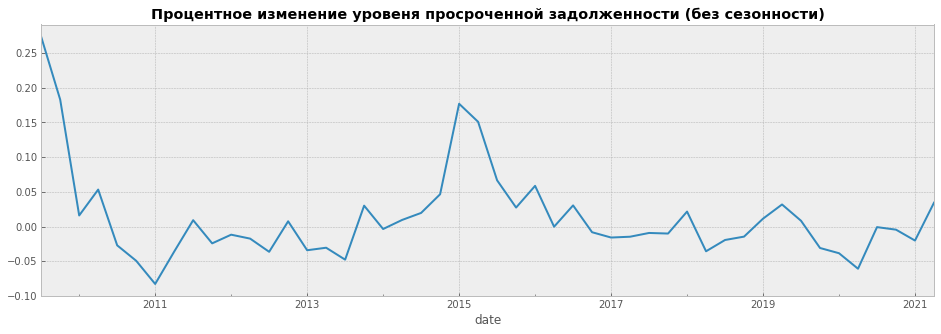

Нет единичных корней, ряд стационарен


In [59]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season_pct'] ,
                                  'Процентное изменение уровеня просроченной задолженности (без сезонности)')

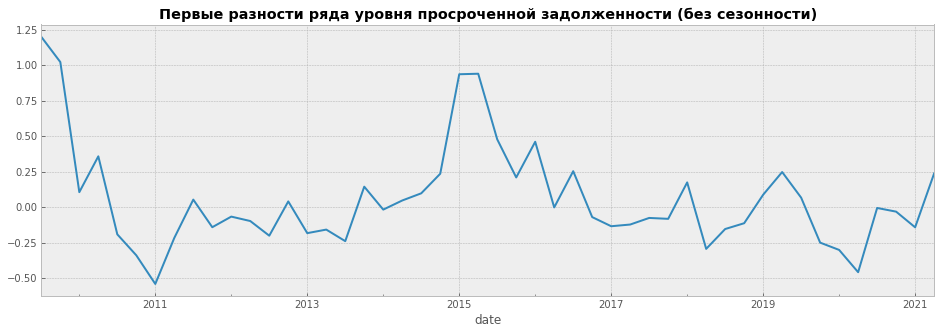

Нет единичных корней, ряд стационарен


In [60]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season_diff'],
                      'Первые разности ряда уровня просроченной задолженности (без сезонности)')

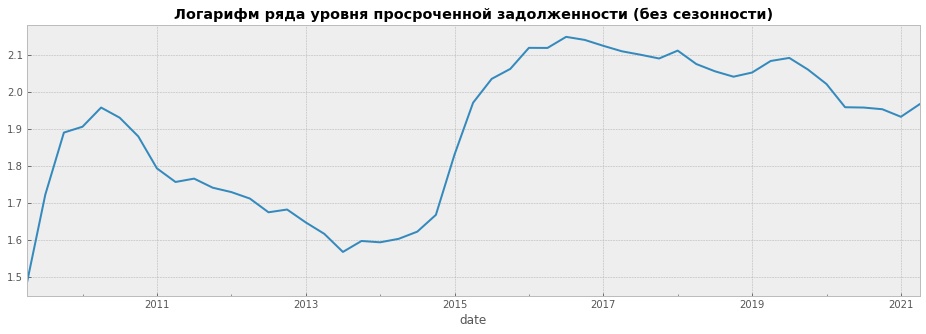

Есть единичные корни, ряд не стационарен


In [61]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season_log'],
                      'Логарифм ряда уровня просроченной задолженности (без сезонности)')

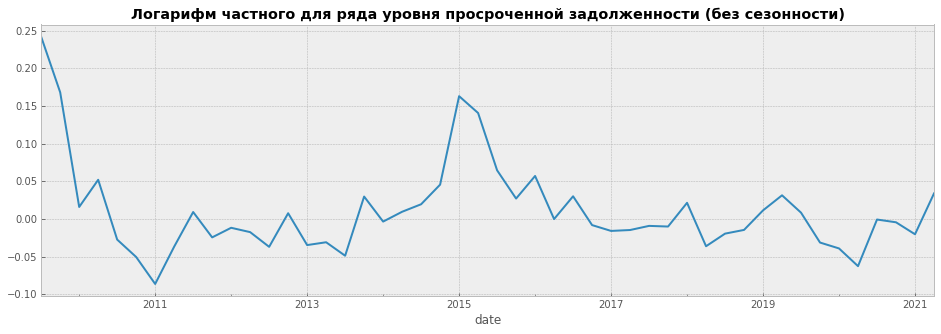

Нет единичных корней, ряд стационарен


In [62]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season_log_diff'],
                      'Логарифм частного для ряда уровня просроченной задолженности (без сезонности)')

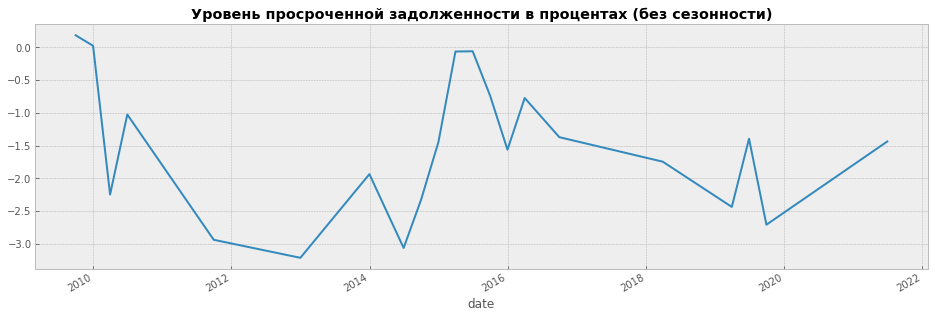

Есть единичные корни, ряд не стационарен


In [63]:
show_and_check_series(history_df['level_of_debt_in_rub_percent_season_log_yt_yt_1'],
                      'Уровень просроченной задолженности в процентах (без сезонности)')

Стационарные модификации ряда уровня просроченной даложненности:

    - Первые разности ряда уровня просроченной задолженности (без сезонности)
    - Процентное изменение уровеня просроченной задолженности (без сезонности)
    - Логарифм частного для ряда уровня просроченной задолженности (без сезонности)
    

In [64]:
stationary_mods=['level_of_debt_in_rub_percent_season_diff',
                 'level_of_debt_in_rub_percent_season_pct',
                 'level_of_debt_in_rub_percent_season_log_diff']

In [65]:
# history_df['level_of_debt_in_rub_percent_season_pct']-history_df['level_of_debt_in_rub_percent_season_log_diff']

#### Временной ряд ВВП

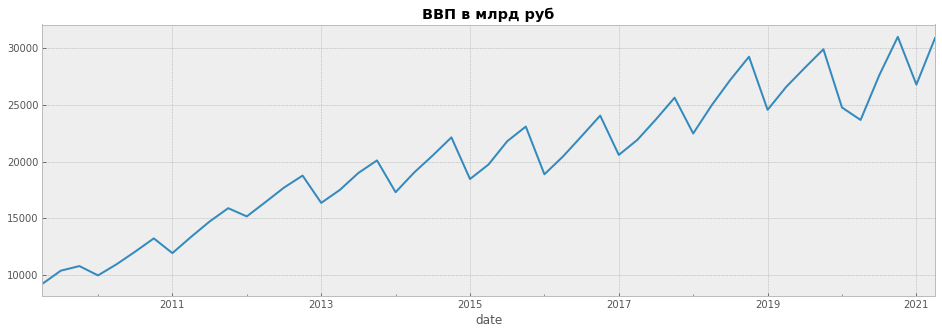

Есть единичные корни, ряд не стационарен


In [66]:
show_and_check_series(history_df['vvp'],
                      'ВВП в млрд руб')

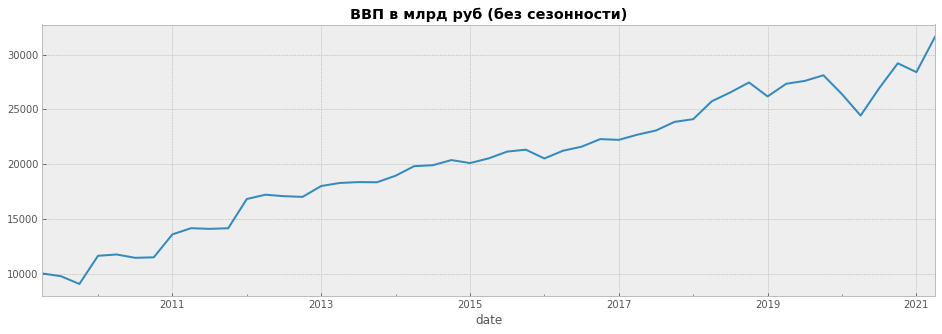

Есть единичные корни, ряд не стационарен


In [67]:
show_and_check_series(history_df['vvp_season'],
                      'ВВП в млрд руб (без сезонности)')

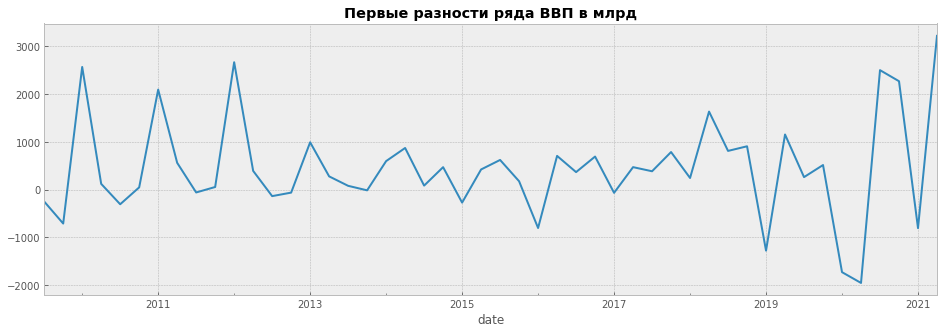

Нет единичных корней, ряд стационарен


In [68]:
show_and_check_series(history_df['vvp_season_diff'],
                      'Первые разности ряда ВВП в млрд')

#### Временной ряд ИПЦ

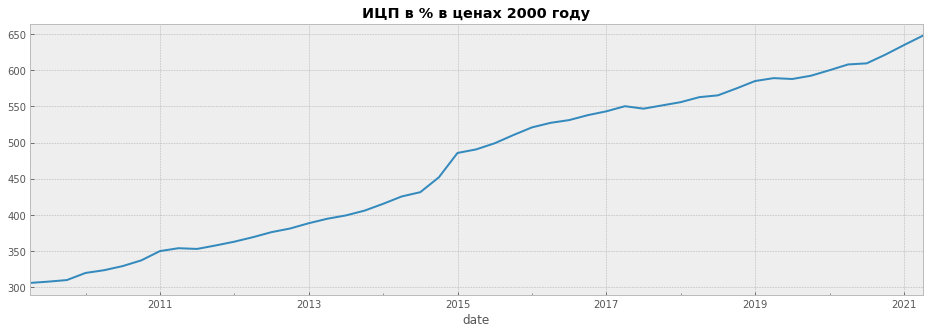

Есть единичные корни, ряд не стационарен


In [69]:
show_and_check_series(history_df['cpi'],
                      'ИЦП в % в ценах 2000 году')

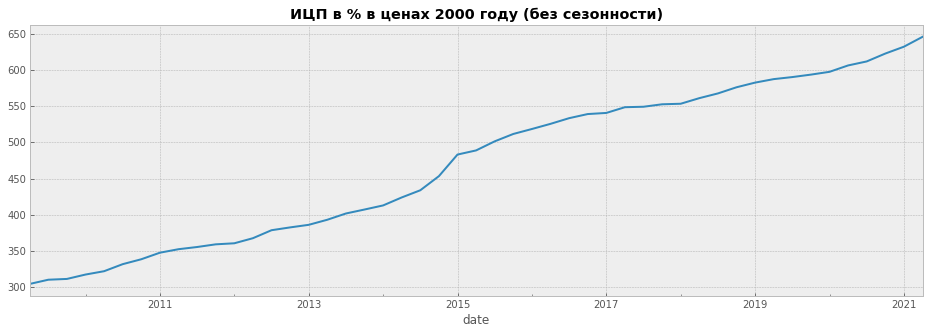

Есть единичные корни, ряд не стационарен


In [70]:
show_and_check_series(history_df['cpi_season'],
                      'ИЦП в % в ценах 2000 году (без сезонности)')

In [71]:
# history_df['cpi_season']-history_df['cpi']

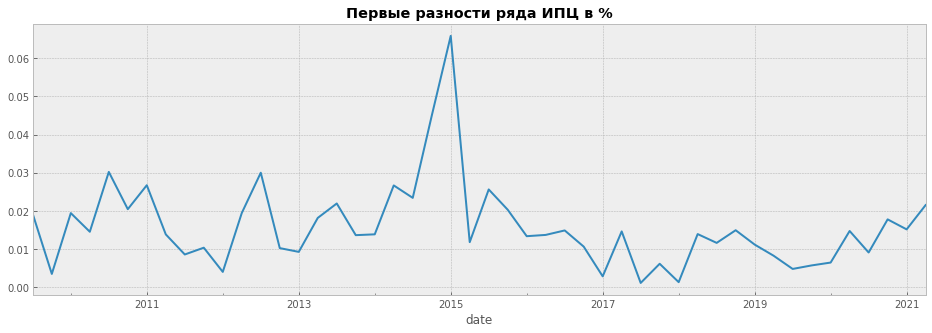

Нет единичных корней, ряд стационарен


In [72]:
show_and_check_series(history_df['cpi_season_pct'],
                      'Первые разности ряда ИПЦ в %')

#### Временной ряд USDRUB

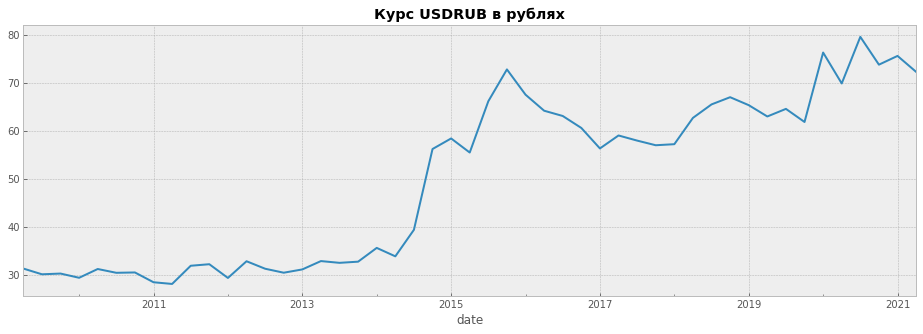

Есть единичные корни, ряд не стационарен


In [73]:
show_and_check_series(history_df['USDRUB'],
                      'Курс USDRUB в рублях')

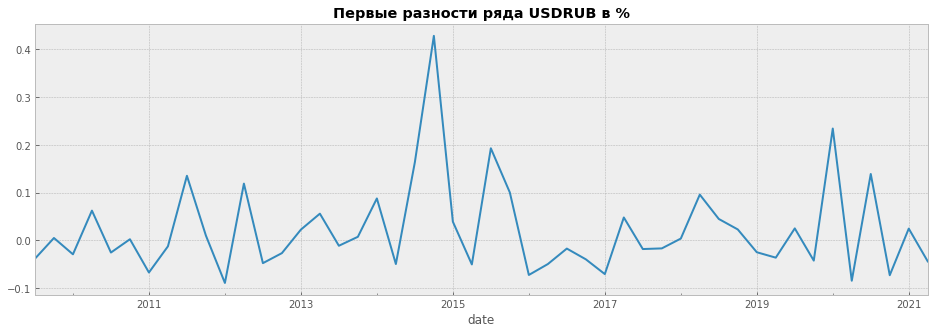

Нет единичных корней, ряд стационарен


In [74]:
show_and_check_series(history_df['USDRUB_pct'],
                      'Первые разности ряда USDRUB в %')

#### Временной ряд ключевой ставки

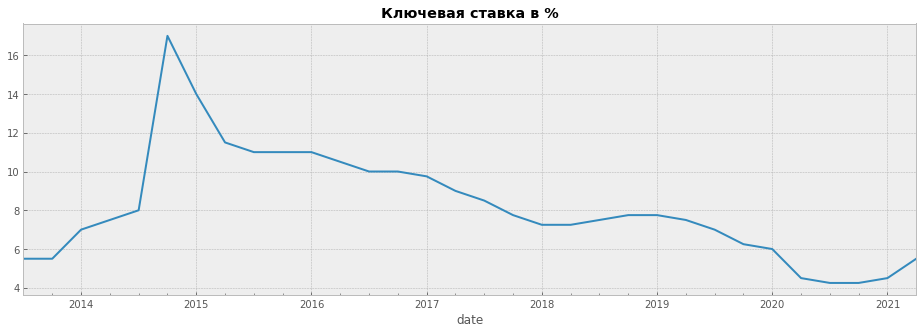

Есть единичные корни, ряд не стационарен


In [75]:
show_and_check_series(history_df['rate'],
                      'Ключевая ставка в %')

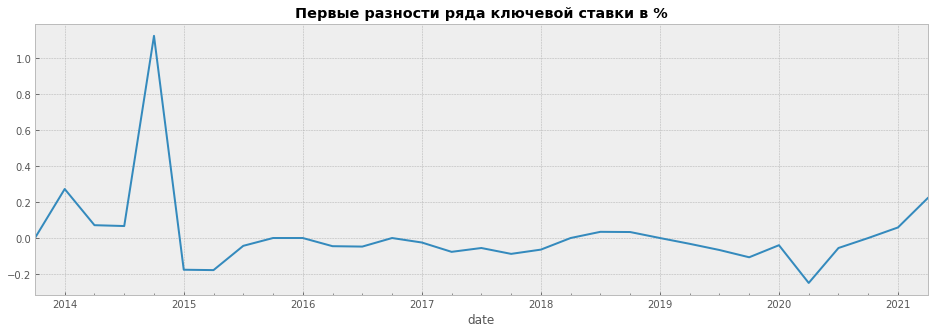

Есть единичные корни, ряд не стационарен


In [76]:
show_and_check_series(history_df['rate_pct'],
                      'Первые разности ряда ключевой ставки в %')

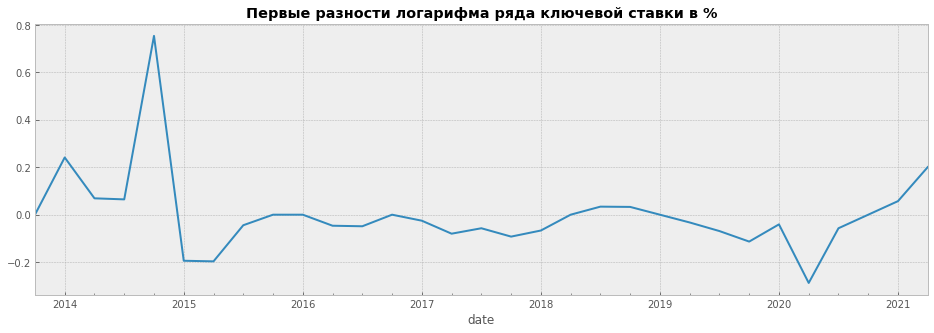

Есть единичные корни, ряд не стационарен


In [77]:
show_and_check_series(history_df['rate_log_diff'],
                      'Первые разности логарифма ряда ключевой ставки в %')

In [78]:
# Клюевая ставка - это довольно дискретный ряд, который сложно остационарить. 
# Будем рассматривать его применимость в модели на этапе корреляционного анализа.

#### Временной ряд уровня безработицы

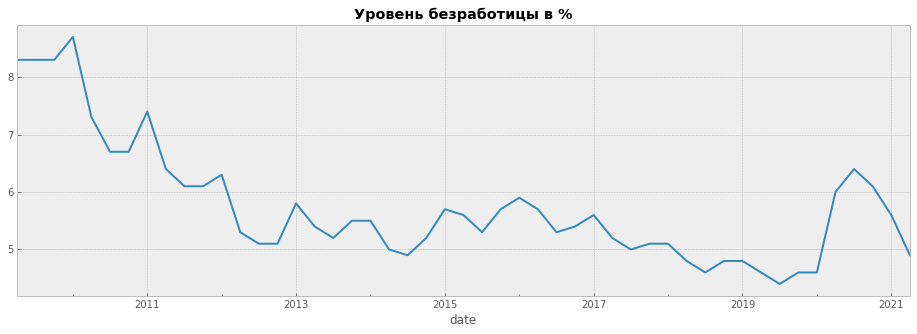

Есть единичные корни, ряд не стационарен


In [79]:
show_and_check_series(history_df['unemployment'],
                      'Уровень безработицы в %')

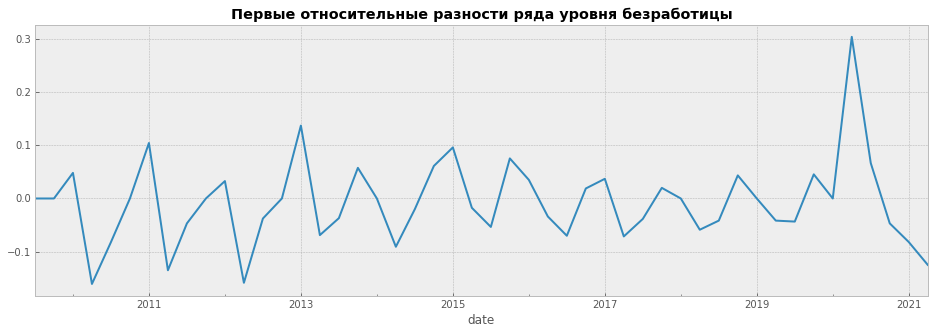

Нет единичных корней, ряд стационарен


In [80]:
show_and_check_series(history_df['unemployment_pct'],
                      'Первые относительные разности ряда уровня безработицы')

#### Временной ряд цен на нефть марки Urals в долларах

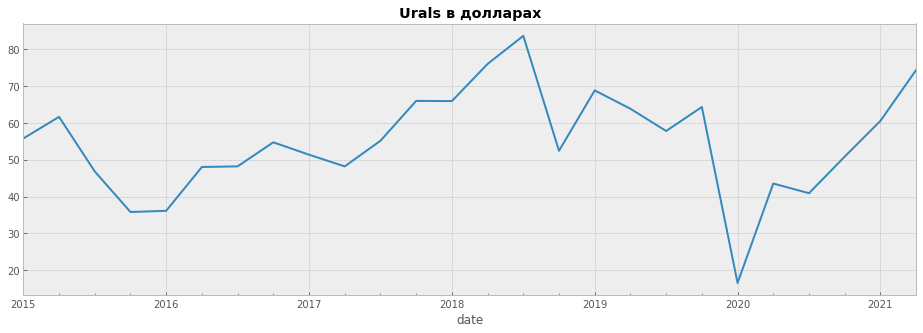

Есть единичные корни, ряд не стационарен


In [81]:
show_and_check_series(history_df['urals'],
                      'Urals в долларах')

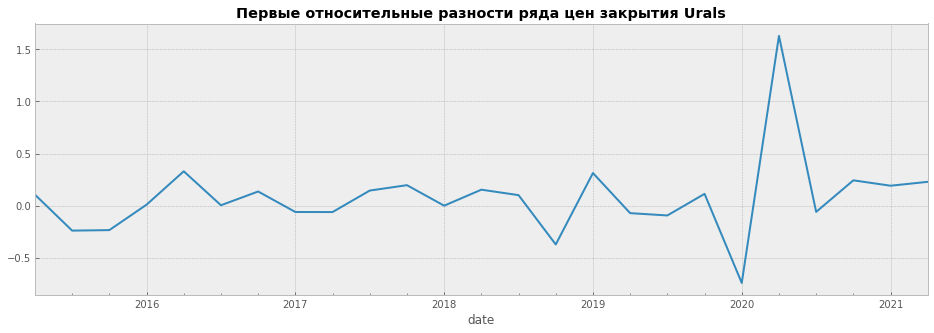

Есть единичные корни, ряд не стационарен


In [82]:
show_and_check_series(history_df['urals_pct'],
                      'Первые относительные разности ряда цен закрытия Urals')

In [83]:
# не актуальный кусок кода


#pure ts
vvp_ts = debt_vvp_cpi_usd_rate_unmpl['vvp in mlrd rub']
cpi_ts = debt_vvp_cpi_usd_rate_unmpl['cpi in percent']
usdrub_ts = debt_vvp_cpi_usd_rate_unmpl['USDRUB in rub']
unemployment_rate_ts = debt_vvp_cpi_usd_rate_unmpl['unemployment rate in percent']
urals_ts = debt_vvp_cpi_usd_rate_unmpl_urals['urals_close']

#log
vvp_log = np.log(debt_vvp_cpi_usd_rate_unmpl['vvp in mlrd rub'])
cpi_log = np.log(debt_vvp_cpi_usd_rate_unmpl['cpi in percent'])
usdrub_log = np.log(debt_vvp_cpi_usd_rate_unmpl['USDRUB in rub'])
unemployment_rate_log = np.log(debt_vvp_cpi_usd_rate_unmpl['unemployment rate in percent'])
urals_log = np.log(debt_vvp_cpi_usd_rate_unmpl_urals['urals_close'])


#diff
vvp_diff = debt_vvp_cpi_usd_rate_unmpl['vvp in mlrd rub'].diff()
vvp_diff.dropna(inplace=True)
cpi_diff = debt_vvp_cpi_usd_rate_unmpl['cpi in percent'].diff()
cpi_diff.dropna(inplace=True)
usdrub_diff = debt_vvp_cpi_usd_rate_unmpl['USDRUB in rub'].diff()
usdrub_diff.dropna(inplace=True)
unemployment_rate_diff = debt_vvp_cpi_usd_rate_unmpl['unemployment rate in percent'].diff()
unemployment_rate_diff.dropna(inplace=True)
urals_diff = debt_vvp_cpi_usd_rate_unmpl_urals['urals_close'].diff()


#pct_change
vvp_pct = debt_vvp_cpi_usd_rate_unmpl['vvp in mlrd rub'].pct_change()
vvp_pct.dropna(inplace=True)
cpi_pct = debt_vvp_cpi_usd_rate_unmpl['cpi in percent'].pct_change()
cpi_pct.dropna(inplace=True)
usdrub_pct = debt_vvp_cpi_usd_rate_unmpl['USDRUB in rub'].pct_change()
usdrub_pct.dropna(inplace=True)
unemployment_rate_pct = debt_vvp_cpi_usd_rate_unmpl['unemployment rate in percent'].pct_change()
unemployment_rate_pct.dropna(inplace=True)
urals_pct = debt_vvp_cpi_usd_rate_unmpl_urals['urals_close'].pct_change()



#log diff
vvp_log_diff = vvp_log - vvp_log.shift(1)
vvp_log_diff.dropna(inplace=True)
cpi_log_diff = cpi_log - cpi_log.shift(1)
cpi_log_diff.dropna(inplace=True)
usdrub_log_diff = usdrub_log - usdrub_log.shift(1)
usdrub_log_diff.dropna(inplace=True)
unemployment_rate_log_diff = unemployment_rate_log - unemployment_rate_log.shift(1)
unemployment_rate_log_diff.dropna(inplace=True)
urals_log_diff = urals_log - urals_log.shift(1)

# Однофакторный анализ

In [84]:
# Основной критерий выбора фактора - качество модели по метрике коэффициент детерминации R^2

In [85]:
# debt_vvp_cpi_usd_rate_unmpl.dropna().reset_index(drop=True)
# debt_vvp_cpi_usd_rate_unmpl

In [86]:
# функция расчета R^2 для однофакторной модели линейно регрессии + учет лаговых данных с лагом 1 и 2
import statsmodels.api as sm

def check_Rsquare(factor_to_check, verbose=True):
    factor_to_check.dropna(inplace=True)
    x = factor_to_check[factor_to_check.columns[0]]
    x_lag1 = x.shift(1)
    x_lag2 = x.shift(2)
    x_lag3 = x.shift(3)
    x_lag4 = x.shift(4)

    y = factor_to_check[factor_to_check.columns[1]]
    dfx = x.to_frame()
    dfx1 = sm.add_constant(dfx)
    result = sm.OLS(y.astype(float), dfx1.astype(float)).fit()    

    dfx_lag1 = x_lag1[1:].to_frame()
    dfx1_lag1 = sm.add_constant(dfx_lag1)
    result_lag1 = sm.OLS(y[1:].astype(float), dfx1_lag1.astype(float)).fit()    
    
    dfx_lag2 = x_lag2[2:].to_frame()
    dfx1_lag2 = sm.add_constant(dfx_lag2)
    result_lag2 = sm.OLS(y[2:].astype(float), dfx1_lag2.astype(float)).fit()   
    
    dfx_lag3 = x_lag3[3:].to_frame()
    dfx1_lag3 = sm.add_constant(dfx_lag3)
    result_lag3 = sm.OLS(y[3:].astype(float), dfx1_lag3.astype(float)).fit() 

    dfx_lag4 = x_lag4[4:].to_frame()
    dfx1_lag4 = sm.add_constant(dfx_lag4)
    result_lag4 = sm.OLS(y[4:].astype(float), dfx1_lag4.astype(float)).fit()
    
    if verbose:
        start = "\033[1m"
        end = "\033[0;0m"
        print(start + factor_to_check.columns[0] + end)
        print('\tRsquared for lag 0: {:.2f}'.format(result.rsquared))
        print('\tRsquared for lag 1: {:.2f}'.format(result_lag1.rsquared))
        print('\tRsquared for lag 2: {:.2f}'.format(result_lag2.rsquared))
        print('\tRsquared for lag 3: {:.2f}'.format(result_lag3.rsquared))
        print('\tRsquared for lag 4: {:.2f}'.format(result_lag4.rsquared))
    
    return (round(result.rsquared, 2), round(result_lag1.rsquared, 2), \
            round(result_lag2.rsquared, 2), round(result_lag3.rsquared, 2), \
            round(result_lag4.rsquared, 2), is_stationary(x, alpha))

def select_columns_for_macrofactor(all_columns, factor):
    # Формирует список вариантов обработки фактора для проверки
    good_columns = []
    for col in temp_list:
        if col[-2] != '_' and 'season' not in col and factor in col:
            good_columns.append(col)
    return good_columns

all_columns = history_df.columns.tolist()


In [87]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
regression_results = pd.DataFrame()
regression_results = pd.DataFrame(index=index, columns=columns)
# target = 'level_of_debt_in_rub_percent_diff' # зависимая переменная
target = 'level_of_debt_in_rub_percent_season_diff' # зависимая переменная без сезонности

In [88]:
# regression_results

In [89]:
line = []
print('Проверка значимости рядов факторов без изменений')
# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals', target]]))
regression_results.loc['Ряд без изменений'] = line

Проверка значимости рядов факторов без изменений
vvp
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
vvp_season
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
cpi
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
cpi_season
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
USDRUB
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
unemployment
	Rsquared for lag 0: 0.09
	Rsquared for lag 1: 0.04
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.03
	Rsquared for lag 4: 0.09
urals
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.04
	Rsquared for lag 3: 0.00
	Rsquared f

In [90]:
line = []
print('Проверка значимости разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_diff', target]]))

regression_results.loc['Первая разность'] = line

Проверка значимости разностей факторов
vvp_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.02
	Rsquared for lag 4: 0.01
vvp_season_diff
	Rsquared for lag 0: 0.01
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
cpi_diff
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.23
	Rsquared for lag 2: 0.20
	Rsquared for lag 3: 0.08
	Rsquared for lag 4: 0.11
cpi_season_diff
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.32
	Rsquared for lag 2: 0.27
	Rsquared for lag 3: 0.15
	Rsquared for lag 4: 0.13
USDRUB_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.15
	Rsquared for lag 3: 0.09
	Rsquared for lag 4: 0.03
unemployment_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.04
	Rsquared for lag 2: 0.02
	Rsquared for lag 3: 0.02
	Rsquared for lag 4: 0.01
urals_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.06
	Rsquared for lag 2: 0.03
	Rsquared fo

In [91]:
line = []
print('Проверка значимости процентных изменений факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_pct', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_pct', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_pct', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_pct', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_pct', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_pct', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_pct', target]]))

regression_results.loc['Процентное изменение'] = line

Проверка значимости процентных изменений факторов
vvp_pct
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
vvp_season_pct
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.02
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.02
cpi_pct
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.21
	Rsquared for lag 2: 0.16
	Rsquared for lag 3: 0.06
	Rsquared for lag 4: 0.09
cpi_season_pct
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.29
	Rsquared for lag 2: 0.21
	Rsquared for lag 3: 0.12
	Rsquared for lag 4: 0.12
USDRUB_pct
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.04
	Rsquared for lag 2: 0.24
	Rsquared for lag 3: 0.09
	Rsquared for lag 4: 0.04
unemployment_pct
	Rsquared for lag 0: 0.01
	Rsquared for lag 1: 0.04
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
urals_pct
	Rsquared for lag 0: 0.06
	Rsquared for lag 1: 0.02
	Rsquared for lag 2: 0.01
	Rsquare

In [92]:
line = []
print('Проверка значимости логарифмических разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log_diff', target]]))

regression_results.loc['Логарифм изменения'] = line

Проверка значимости логарифмических разностей факторов
vvp_log_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
vvp_season_log_diff
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.02
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.02
cpi_log_diff
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.21
	Rsquared for lag 2: 0.16
	Rsquared for lag 3: 0.07
	Rsquared for lag 4: 0.09
cpi_season_log_diff
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.29
	Rsquared for lag 2: 0.21
	Rsquared for lag 3: 0.12
	Rsquared for lag 4: 0.11
USDRUB_log_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.22
	Rsquared for lag 3: 0.09
	Rsquared for lag 4: 0.04
unemployment_log_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.04
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
urals_log_diff
	Rsquared for lag 0: 0.00
	Rsquared for lag 1:

In [93]:
line = []
print('Проверка значимости логарифмов факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log', target]]))

regression_results.loc['Логарифм ряда'] = line

Проверка значимости логарифмов факторов
vvp_log
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.02
	Rsquared for lag 4: 0.03
vvp_season_log
	Rsquared for lag 0: 0.06
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.03
cpi_log
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.01
cpi_season_log
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.01
USDRUB_log
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.02
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
unemployment_log
	Rsquared for lag 0: 0.08
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.02
	Rsquared for lag 4: 0.08
urals_log
	Rsquared for lag 0: 0.01
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.02
	Rsquared for lag 

### Однофакторный анализ для целевой переменной: первая разница уровня задолженности

In [94]:
target

'level_of_debt_in_rub_percent_season_diff'

In [95]:
#данные в виде словарей (лаг 0, лаг1, лаг2, лаг3, лаг4, стационарен ? true : false)
regression_results

ВВП  \
Ряд без изменений      (0.04, 0.01, 0.0, 0.01, 0.01, False)   
Первая разность           (0.0, 0.0, 0.0, 0.02, 0.01, True)   
Процентное изменение     (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм изменения       (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм ряда         (0.05, 0.01, 0.01, 0.02, 0.03, False)   

                                         ВВП без сезонности  \
Ряд без изменений      (0.05, 0.01, 0.0, 0.01, 0.01, False)   
Первая разность         (0.01, 0.0, 0.01, 0.01, 0.01, True)   
Процентное изменение     (0.04, 0.0, 0.02, 0.0, 0.02, True)   
Логарифм изменения       (0.04, 0.0, 0.02, 0.0, 0.02, True)   
Логарифм ряда         (0.06, 0.01, 0.01, 0.01, 0.03, False)   

                                                       ИПЦ  \
Ряд без изменений        (0.02, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность        (0.02, 0.23, 0.2, 0.08, 0.11, True)   
Процентное изменение  (0.02, 0.21, 0.16, 0.06, 0.09, True)   
Логарифм изменения    (0.02, 0.21, 0.16, 0.07, 0.09, True)   
Логарифм ряда           (0.02, 0.0, 0.0, 0.0, 0.01, False)   

                                        ИПЦ без сезонности  \
Ряд без изменений        (0.02, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность       (0.05, 0.32, 0.27, 0.15, 0.13, True)   
Процентное изменение  (0.04, 0.29, 0.21, 0.12, 0.12, True)   
Логарифм изменения    (0.04, 0.29, 0.21, 0.12, 0.11, True)   
Логарифм ряда           (0.02, 0.0, 0.0, 0.0, 0.01, False)   

                                             Курс доллара  \
Ряд без изменений      (0.0, 0.01, 0.01, 0.0, 0.0, False)   
Первая разность       (0.0, 0.03, 0.15, 0.09, 0.03, True)   
Процентное изменение  (0.0, 0.04, 0.24, 0.09, 0.04, True)   
Логарифм изменения    (0.0, 0.03, 0.22, 0.09, 0.04, True)   
Логарифм ряда          (0.0, 0.01, 0.02, 0.0, 0.0, False)   

                                               Безработица  \
Ряд без изменений     (0.09, 0.04, 0.01, 0.03, 0.09, True)   
Первая разность       (0.0, 0.04, 0.02, 0.02, 0.01, False)   
Процентное изменение  (0.01, 0.04, 0.01, 0.01, 0.01, True)   
Логарифм изменения    (0.0, 0.04, 0.01, 0.01, 0.01, False)   
Логарифм ряда         (0.08, 0.03, 0.01, 0.02, 0.08, True)   

                                                     Urals  
Ряд без изменений       (0.0, 0.0, 0.04, 0.0, 0.01, False)  
Первая разность        (0.0, 0.06, 0.03, 0.02, 0.05, True)  
Процентное изменение  (0.06, 0.02, 0.01, 0.03, 0.1, False)  
Логарифм изменения     (0.0, 0.07, 0.01, 0.02, 0.06, True)  
Логарифм ряда          (0.01, 0.03, 0.02, 0.0, 0.01, True)

По результатам однофакторного анализа с линейной регрессией целевой переменной: первая разница уровня задолженности:

- линейная регрессия показывает довольно низкий  уровень (R^2<0.4) значимости для всех объясняющих переменных

- для дальнейшего анализа рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        процентное изменение USDRUB с лагом 2,
        Безработица (или логарифм Безработицы),
        логарифм изменения Urals с лагом 1
        
        + модификации ИПЦ (Процентное изменение лаг 1, Логарифм изменения лаг 1) и Курса доллара (Первая разность лаг 2, Логарифм изменения лаг 2) - можно добавить в многофакторный анализ по результатам корреляционного анализа

### Однофакторный анализ для целевой переменной: процентное изменение разницы уровня задолженности

In [96]:
stationary_mods

['level_of_debt_in_rub_percent_season_diff',
 'level_of_debt_in_rub_percent_season_pct',
 'level_of_debt_in_rub_percent_season_log_diff']

In [97]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
regression_results = pd.DataFrame()
regression_results = pd.DataFrame(index=index, columns=columns)
target = stationary_mods[1] # зависимая переменная без сезонности
target

'level_of_debt_in_rub_percent_season_pct'

In [98]:
line = []
print('Проверка значимости рядов факторов без изменений')
# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals', target]]))
regression_results.loc['Ряд без изменений'] = line


line = []
print('Проверка значимости разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_diff', target]]))

regression_results.loc['Первая разность'] = line

line = []
print('Проверка значимости процентных изменений факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_pct', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_pct', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_pct', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_pct', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_pct', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_pct', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_pct', target]]))

regression_results.loc['Процентное изменение'] = line

line = []
print('Проверка значимости логарифмических разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log_diff', target]]))

regression_results.loc['Логарифм изменения'] = line


line = []
print('Проверка значимости логарифмов факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log', target]]))

regression_results.loc['Логарифм ряда'] = line
regression_results


Проверка значимости рядов факторов без изменений
vvp
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
vvp_season
	Rsquared for lag 0: 0.06
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.02
cpi
	Rsquared for lag 0: 0.03
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
cpi_season
	Rsquared for lag 0: 0.03
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
USDRUB
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
unemployment
	Rsquared for lag 0: 0.13
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.03
	Rsquared for lag 4: 0.09
urals
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.03
	Rsquared for lag 3: 0.00
	Rsquared f

ВВП  \
Ряд без изменений     (0.05, 0.01, 0.01, 0.01, 0.01, False)   
Первая разность           (0.0, 0.0, 0.0, 0.01, 0.01, True)   
Процентное изменение     (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм изменения       (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм ряда         (0.06, 0.01, 0.01, 0.02, 0.03, False)   

                                         ВВП без сезонности  \
Ряд без изменений      (0.06, 0.01, 0.0, 0.01, 0.02, False)   
Первая разность         (0.02, 0.0, 0.01, 0.01, 0.01, True)   
Процентное изменение     (0.04, 0.0, 0.02, 0.0, 0.02, True)   
Логарифм изменения       (0.05, 0.0, 0.02, 0.0, 0.02, True)   
Логарифм ряда         (0.08, 0.01, 0.01, 0.02, 0.04, False)   

                                                       ИПЦ  \
Ряд без изменений        (0.03, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность       (0.02, 0.23, 0.17, 0.07, 0.08, True)   
Процентное изменение   (0.02, 0.2, 0.14, 0.05, 0.07, True)   
Логарифм изменения     (0.02, 0.2, 0.14, 0.05, 0.07, True)   
Логарифм ряда           (0.03, 0.0, 0.0, 0.0, 0.01, False)   

                                        ИПЦ без сезонности  \
Ряд без изменений        (0.03, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность       (0.05, 0.32, 0.25, 0.12, 0.09, True)   
Процентное изменение    (0.05, 0.3, 0.19, 0.1, 0.08, True)   
Логарифм изменения      (0.05, 0.3, 0.19, 0.1, 0.08, True)   
Логарифм ряда           (0.03, 0.0, 0.0, 0.0, 0.01, False)   

                                             Курс доллара  \
Ряд без изменений      (0.0, 0.01, 0.01, 0.0, 0.0, False)   
Первая разность       (0.0, 0.04, 0.15, 0.06, 0.02, True)   
Процентное изменение  (0.0, 0.06, 0.25, 0.07, 0.03, True)   
Логарифм изменения    (0.0, 0.05, 0.23, 0.06, 0.03, True)   
Логарифм ряда          (0.0, 0.01, 0.02, 0.0, 0.0, False)   

                                               Безработица  \
Ряд без изменений     (0.13, 0.03, 0.01, 0.03, 0.09, True)   
Первая разность       (0.0, 0.04, 0.01, 0.02, 0.01, False)   
Процентное изменение   (0.0, 0.03, 0.01, 0.01, 0.01, True)   
Логарифм изменения    (0.0, 0.04, 0.01, 0.01, 0.01, False)   
Логарифм ряда         (0.11, 0.03, 0.01, 0.03, 0.08, True)   

                                                      Urals  
Ряд без изменений       (0.0, 0.01, 0.03, 0.0, 0.01, False)  
Первая разность         (0.0, 0.06, 0.03, 0.01, 0.06, True)  
Процентное изменение  (0.05, 0.02, 0.01, 0.03, 0.12, False)  
Логарифм изменения      (0.0, 0.07, 0.01, 0.02, 0.08, True)  
Логарифм ряда           (0.01, 0.03, 0.02, 0.0, 0.01, True)

По результатам однофакторного анализа с линейной регрессией целевой переменной: процентное изменение разницы уровня задолженности:

- для дальнейшего анализа рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        процентное изменение USDRUB с лагом 2,
        Безработица (или логарифм Безработицы),
        логарифм изменения Urals с лагом 1


### Однофакторный анализ для целевой переменной: логарифм изменения (частного) уровня задолженности

In [99]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
regression_results = pd.DataFrame()
regression_results = pd.DataFrame(index=index, columns=columns)
target = stationary_mods[2] # зависимая переменная без сезонности
target

'level_of_debt_in_rub_percent_season_log_diff'

In [100]:
line = []
print('Проверка значимости рядов факторов без изменений')
# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals', target]]))
regression_results.loc['Ряд без изменений'] = line


line = []
print('Проверка значимости разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_diff', target]]))

regression_results.loc['Первая разность'] = line

line = []
print('Проверка значимости процентных изменений факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_pct', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_pct', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_pct', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_pct', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_pct', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_pct', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_pct', target]]))

regression_results.loc['Процентное изменение'] = line

line = []
print('Проверка значимости логарифмических разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log_diff', target]]))

regression_results.loc['Логарифм изменения'] = line


line = []
print('Проверка значимости логарифмов факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log', target]]))

regression_results.loc['Логарифм ряда'] = line
regression_results


Проверка значимости рядов факторов без изменений
vvp
	Rsquared for lag 0: 0.04
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.01
vvp_season
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.01
	Rsquared for lag 4: 0.02
cpi
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
cpi_season
	Rsquared for lag 0: 0.02
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.00
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
USDRUB
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.00
	Rsquared for lag 4: 0.00
unemployment
	Rsquared for lag 0: 0.11
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.03
	Rsquared for lag 4: 0.10
urals
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.03
	Rsquared for lag 3: 0.00
	Rsquared f

ВВП  \
Ряд без изменений     (0.04, 0.0, 0.01, 0.01, 0.01, False)   
Первая разность          (0.0, 0.0, 0.0, 0.01, 0.01, True)   
Процентное изменение    (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм изменения      (0.0, 0.0, 0.0, 0.01, 0.01, False)   
Логарифм ряда         (0.06, 0.0, 0.01, 0.02, 0.04, False)   

                                         ВВП без сезонности  \
Ряд без изменений      (0.05, 0.01, 0.0, 0.01, 0.02, False)   
Первая разность         (0.02, 0.0, 0.01, 0.01, 0.01, True)   
Процентное изменение     (0.04, 0.0, 0.02, 0.0, 0.03, True)   
Логарифм изменения       (0.05, 0.0, 0.02, 0.0, 0.02, True)   
Логарифм ряда         (0.08, 0.01, 0.01, 0.02, 0.04, False)   

                                                       ИПЦ  \
Ряд без изменений        (0.02, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность       (0.02, 0.22, 0.17, 0.07, 0.08, True)   
Процентное изменение  (0.02, 0.19, 0.14, 0.05, 0.07, True)   
Логарифм изменения    (0.02, 0.19, 0.14, 0.05, 0.07, True)   
Логарифм ряда          (0.03, 0.0, 0.01, 0.0, 0.01, False)   

                                       ИПЦ без сезонности  \
Ряд без изменений       (0.02, 0.0, 0.0, 0.0, 0.0, False)   
Первая разность       (0.05, 0.32, 0.25, 0.12, 0.1, True)   
Процентное изменение  (0.05, 0.29, 0.19, 0.1, 0.08, True)   
Логарифм изменения    (0.05, 0.29, 0.19, 0.1, 0.08, True)   
Логарифм ряда         (0.03, 0.0, 0.01, 0.0, 0.01, False)   

                                             Курс доллара  \
Ряд без изменений      (0.0, 0.01, 0.01, 0.0, 0.0, False)   
Первая разность       (0.0, 0.04, 0.15, 0.06, 0.02, True)   
Процентное изменение  (0.0, 0.06, 0.24, 0.07, 0.03, True)   
Логарифм изменения    (0.0, 0.04, 0.22, 0.07, 0.03, True)   
Логарифм ряда          (0.0, 0.01, 0.02, 0.0, 0.0, False)   

                                               Безработица  \
Ряд без изменений      (0.11, 0.03, 0.01, 0.03, 0.1, True)   
Первая разность       (0.0, 0.04, 0.01, 0.02, 0.01, False)   
Процентное изменение   (0.0, 0.03, 0.01, 0.01, 0.01, True)   
Логарифм изменения    (0.0, 0.04, 0.01, 0.01, 0.01, False)   
Логарифм ряда          (0.1, 0.03, 0.01, 0.03, 0.08, True)   

                                                      Urals  
Ряд без изменений       (0.0, 0.01, 0.03, 0.0, 0.01, False)  
Первая разность         (0.0, 0.06, 0.03, 0.01, 0.06, True)  
Процентное изменение  (0.06, 0.03, 0.01, 0.03, 0.12, False)  
Логарифм изменения      (0.0, 0.08, 0.01, 0.02, 0.08, True)  
Логарифм ряда           (0.01, 0.03, 0.02, 0.0, 0.01, True)

По результатам однофакторного анализа с линейной регрессией целевой переменной: логарифм изменения (частного) уровня задолженности:

- для дальнейшего анализа рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        процентное изменение USDRUB с лагом 2,
        Безработица (или логарифм Безработицы),
        логарифм изменения Urals с лагом 1

### Однофакторный анализ для целевой переменной: логарифм изменения (разницы) уровня задолженности

In [101]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
regression_results = pd.DataFrame()
regression_results = pd.DataFrame(index=index, columns=columns)

target = 'level_of_debt_in_rub_percent_season_log_yt_yt_1' # зависимая переменная без сезонности
target

'level_of_debt_in_rub_percent_season_log_yt_yt_1'

In [102]:
line = []
print('Проверка значимости рядов факторов без изменений')
# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals', target]]))
regression_results.loc['Ряд без изменений'] = line


line = []
print('Проверка значимости разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_diff', target]]))

regression_results.loc['Первая разность'] = line

line = []
print('Проверка значимости процентных изменений факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_pct', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_pct', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_pct', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_pct', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_pct', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_pct', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_pct', target]]))

regression_results.loc['Процентное изменение'] = line

line = []
print('Проверка значимости логарифмических разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log_diff', target]]))

regression_results.loc['Логарифм изменения'] = line


line = []
print('Проверка значимости логарифмов факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log', target]]))

regression_results.loc['Логарифм ряда'] = line
regression_results


Проверка значимости рядов факторов без изменений
vvp
	Rsquared for lag 0: 0.07
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.12
	Rsquared for lag 3: 0.17
	Rsquared for lag 4: 0.25
vvp_season
	Rsquared for lag 0: 0.05
	Rsquared for lag 1: 0.00
	Rsquared for lag 2: 0.08
	Rsquared for lag 3: 0.14
	Rsquared for lag 4: 0.31
cpi
	Rsquared for lag 0: 0.01
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.07
	Rsquared for lag 3: 0.06
	Rsquared for lag 4: 0.12
cpi_season
	Rsquared for lag 0: 0.01
	Rsquared for lag 1: 0.01
	Rsquared for lag 2: 0.07
	Rsquared for lag 3: 0.06
	Rsquared for lag 4: 0.12
USDRUB
	Rsquared for lag 0: 0.03
	Rsquared for lag 1: 0.10
	Rsquared for lag 2: 0.11
	Rsquared for lag 3: 0.02
	Rsquared for lag 4: 0.00
unemployment
	Rsquared for lag 0: 0.18
	Rsquared for lag 1: 0.02
	Rsquared for lag 2: 0.10
	Rsquared for lag 3: 0.23
	Rsquared for lag 4: 0.39
urals
	Rsquared for lag 0: 0.07
	Rsquared for lag 1: 0.10
	Rsquared for lag 2: 0.04
	Rsquared for lag 3: 0.03
	Rsquared f

ВВП  \
Ряд без изменений     (0.07, 0.0, 0.12, 0.17, 0.25, False)   
Первая разность       (0.01, 0.03, 0.01, 0.12, 0.03, True)   
Процентное изменение    (0.0, 0.04, 0.0, 0.14, 0.06, True)   
Логарифм изменения     (0.01, 0.04, 0.0, 0.13, 0.06, True)   
Логарифм ряда         (0.08, 0.0, 0.13, 0.18, 0.29, False)   

                                        ВВП без сезонности  \
Ряд без изменений     (0.05, 0.0, 0.08, 0.14, 0.31, False)   
Первая разность          (0.02, 0.0, 0.0, 0.0, 0.02, True)   
Процентное изменение  (0.06, 0.01, 0.05, 0.03, 0.01, True)   
Логарифм изменения    (0.06, 0.01, 0.04, 0.02, 0.01, True)   
Логарифм ряда         (0.08, 0.0, 0.08, 0.15, 0.36, False)   

                                                        ИПЦ  \
Ряд без изменений     (0.01, 0.01, 0.07, 0.06, 0.12, False)   
Первая разность       (0.06, 0.31, 0.16, 0.05, 0.17, False)   
Процентное изменение   (0.05, 0.31, 0.12, 0.03, 0.16, True)   
Логарифм изменения     (0.05, 0.31, 0.12, 0.04, 0.16, True)   
Логарифм ряда         (0.01, 0.01, 0.09, 0.08, 0.16, False)   

                                         ИПЦ без сезонности  \
Ряд без изменений     (0.01, 0.01, 0.07, 0.06, 0.12, False)   
Первая разность       (0.06, 0.35, 0.27, 0.18, 0.13, False)   
Процентное изменение  (0.06, 0.35, 0.22, 0.17, 0.12, False)   
Логарифм изменения    (0.06, 0.35, 0.22, 0.18, 0.12, False)   
Логарифм ряда         (0.01, 0.01, 0.09, 0.08, 0.16, False)   

                                              Курс доллара  \
Ряд без изменений      (0.03, 0.1, 0.11, 0.02, 0.0, False)   
Первая разность        (0.0, 0.07, 0.34, 0.06, 0.0, False)   
Процентное изменение   (0.0, 0.05, 0.35, 0.05, 0.0, False)   
Логарифм изменения     (0.0, 0.04, 0.34, 0.05, 0.0, False)   
Логарифм ряда         (0.03, 0.1, 0.14, 0.04, 0.01, False)   

                                               Безработица  \
Ряд без изменений      (0.18, 0.02, 0.1, 0.23, 0.39, True)   
Первая разность        (0.01, 0.28, 0.1, 0.01, 0.1, False)   
Процентное изменение  (0.02, 0.3, 0.08, 0.02, 0.07, False)   
Логарифм изменения    (0.02, 0.3, 0.09, 0.02, 0.08, False)   
Логарифм ряда          (0.2, 0.01, 0.1, 0.24, 0.41, False)   

                                                      Urals  
Ряд без изменений      (0.07, 0.1, 0.04, 0.03, 0.21, False)  
Первая разность       (0.02, 0.01, 0.66, 0.02, 0.11, False)  
Процентное изменение   (0.02, 0.0, 0.63, 0.02, 0.15, False)  
Логарифм изменения     (0.02, 0.0, 0.62, 0.01, 0.15, False)  
Логарифм ряда          (0.05, 0.09, 0.03, 0.04, 0.2, False)

По результатам однофакторного анализа с линейной регрессией целевой переменной: логарифм изменения (разницы) уровня задолженности:

- для дальнейшего анализа рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        процентное изменение USDRUB с лагом 2,
        логарифм ряда Безработица с лагом 4,
        первая разность Urals с лагом 2
        
        однако у логарифма разницы много Nan
        значений, что делает его неудобным для анализа 

In [103]:
history_df[[target]].isna().sum()

level_of_debt_in_rub_percent_season_log_yt_yt_1    28
dtype: int64

### Также проведем однофакторный анализ с логарифмической формой линейной регрессии, где целевой переменной будет логарифм уровня задолженности

In [104]:
target_log = 'level_of_debt_in_rub_percent_season_log'

In [105]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
regression_results = pd.DataFrame(index=index, columns=columns)

line = []
print('Проверка значимости рядов факторов без изменений')
# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp', target_log]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season', target_log]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi', target_log]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season', target_log]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB', target_log]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment', target_log]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals', target_log]]))
regression_results.loc['Ряд без изменений'] = line

line = []
print('Проверка значимости логарифмов факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log', target_log]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log', target_log]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log', target_log]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log', target_log]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log', target_log]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log', target_log]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log', target_log]]))

regression_results.loc['Логарифм ряда'] = line

line = []
print('Проверка значимости разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_diff', target_log]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_diff', target_log]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_diff', target_log]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_diff', target_log]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_diff', target_log]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_diff', target_log]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_diff', target_log]]))

regression_results.loc['Первая разность'] = line


line = []
print('Проверка значимости логарифмических разностей факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_log_diff', target_log]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_log_diff', target_log]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_log_diff', target_log]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_log_diff', target_log]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_log_diff', target_log]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_log_diff', target_log]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_log_diff', target_log]]))

regression_results.loc['Логарифм изменения'] = line

line = []
print('Проверка значимости процентных изменений факторов')

# 1 - проверка значимости ВВП
line.append(check_Rsquare(history_df[['vvp_pct', target_log]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare(history_df[['vvp_season_pct', target_log]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare(history_df[['cpi_pct', target_log]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare(history_df[['cpi_season_pct', target_log]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare(history_df[['USDRUB_pct', target_log]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare(history_df[['unemployment_pct', target_log]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare(history_df[['urals_pct', target_log]]))

regression_results.loc['Процентное изменение'] = line

regression_results

Проверка значимости рядов факторов без изменений
vvp
	Rsquared for lag 0: 0.29
	Rsquared for lag 1: 0.25
	Rsquared for lag 2: 0.24
	Rsquared for lag 3: 0.27
	Rsquared for lag 4: 0.29
vvp_season
	Rsquared for lag 0: 0.30
	Rsquared for lag 1: 0.27
	Rsquared for lag 2: 0.26
	Rsquared for lag 3: 0.28
	Rsquared for lag 4: 0.31
cpi
	Rsquared for lag 0: 0.48
	Rsquared for lag 1: 0.46
	Rsquared for lag 2: 0.46
	Rsquared for lag 3: 0.47
	Rsquared for lag 4: 0.49
cpi_season
	Rsquared for lag 0: 0.48
	Rsquared for lag 1: 0.46
	Rsquared for lag 2: 0.46
	Rsquared for lag 3: 0.47
	Rsquared for lag 4: 0.49
USDRUB
	Rsquared for lag 0: 0.54
	Rsquared for lag 1: 0.59
	Rsquared for lag 2: 0.63
	Rsquared for lag 3: 0.64
	Rsquared for lag 4: 0.66
unemployment
	Rsquared for lag 0: 0.08
	Rsquared for lag 1: 0.03
	Rsquared for lag 2: 0.03
	Rsquared for lag 3: 0.04
	Rsquared for lag 4: 0.07
urals
	Rsquared for lag 0: 0.00
	Rsquared for lag 1: 0.02
	Rsquared for lag 2: 0.01
	Rsquared for lag 3: 0.00
	Rsquared f

ВВП  \
Ряд без изменений     (0.29, 0.25, 0.24, 0.27, 0.29, False)   
Первая разность             (0.0, 0.0, 0.0, 0.0, 0.0, True)   
Процентное изменение      (0.0, 0.0, 0.0, 0.0, 0.01, False)   
Логарифм изменения       (0.0, 0.01, 0.0, 0.0, 0.01, False)   
Логарифм ряда          (0.26, 0.21, 0.2, 0.23, 0.26, False)   

                                        ВВП без сезонности  \
Ряд без изменений     (0.3, 0.27, 0.26, 0.28, 0.31, False)   
Первая разность           (0.0, 0.0, 0.0, 0.0, 0.01, True)   
Процентное изменение   (0.0, 0.01, 0.01, 0.02, 0.03, True)   
Логарифм изменения     (0.0, 0.01, 0.01, 0.02, 0.03, True)   
Логарифм ряда         (0.26, 0.22, 0.2, 0.23, 0.26, False)   

                                                        ИПЦ  \
Ряд без изменений     (0.48, 0.46, 0.46, 0.47, 0.49, False)   
Первая разность          (0.02, 0.0, 0.0, 0.02, 0.04, True)   
Процентное изменение     (0.09, 0.03, 0.01, 0.0, 0.0, True)   
Логарифм изменения       (0.09, 0.03, 0.01, 0.0, 0.0, True)   
Логарифм ряда         (0.46, 0.44, 0.43, 0.46, 0.48, False)   

                                         ИПЦ без сезонности  \
Ряд без изменений     (0.48, 0.46, 0.46, 0.47, 0.49, False)   
Первая разность         (0.03, 0.0, 0.01, 0.02, 0.05, True)   
Процентное изменение     (0.12, 0.05, 0.01, 0.0, 0.0, True)   
Логарифм изменения       (0.13, 0.05, 0.01, 0.0, 0.0, True)   
Логарифм ряда         (0.46, 0.44, 0.44, 0.46, 0.48, False)   

                                               Курс доллара  \
Ряд без изменений     (0.54, 0.59, 0.63, 0.64, 0.66, False)   
Первая разность          (0.02, 0.0, 0.0, 0.01, 0.01, True)   
Процентное изменение    (0.03, 0.01, 0.0, 0.01, 0.01, True)   
Логарифм изменения      (0.03, 0.01, 0.0, 0.01, 0.01, True)   
Логарифм ряда         (0.55, 0.61, 0.65, 0.67, 0.68, False)   

                                                Безработица  \
Ряд без изменений     (0.08, 0.03, 0.03, 0.04, 0.07, False)   
Первая разность         (0.0, 0.0, 0.01, 0.02, 0.02, False)   
Процентное изменение     (0.0, 0.0, 0.01, 0.01, 0.02, True)   
Логарифм изменения      (0.0, 0.0, 0.01, 0.02, 0.02, False)   
Логарифм ряда         (0.08, 0.04, 0.03, 0.05, 0.08, False)   

                                                      Urals  
Ряд без изменений        (0.0, 0.02, 0.01, 0.0, 0.0, False)  
Первая разность           (0.01, 0.0, 0.0, 0.0, 0.01, True)  
Процентное изменение  (0.06, 0.03, 0.03, 0.05, 0.02, False)  
Логарифм изменения        (0.01, 0.0, 0.0, 0.0, 0.01, True)  
Логарифм ряда           (0.0, 0.03, 0.02, 0.02, 0.02, True)

По результатам однофакторного анализа с линейной регрессией целевой переменной: логарифм изменения (частного) уровня задолженности:

- для дальнейшего анализа рекомендуется обратить внимание на значимые **стационарные** факторы:
        процентное изменнение ИПЦ без сезонности
        
- для дальнейшего анализа рекомендуется обратить внимание на значимые **нестационарные** факторы:
        ВВП без сезонности лаг 1
        ИПЦ без сезонности
        логарифм ряда USDRUB лаг 2        

### Дополнительно попробуем квадратичную регрессию

In [106]:
def calc_metrics(true, pred):
    R2 = metrics.r2_score(true, pred)
    return R2

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

def polyfit(trainData,shift,not_null_index):
    poly = PolynomialFeatures(degree=2)
    trainData = trainData[-not_null_index:].reset_index(drop=True).astype(float)
    poly.fit(trainData.to_frame())
    poly_train = poly.transform(trainData.to_frame())
    regressionModel = linear_model.Ridge(alpha=0)
    trainDependentVariables = history_df[target][-not_null_index:].reset_index(drop=True).astype(float)[shift:]
    regressionModel.fit(poly_train, trainDependentVariables)
    return calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

# polyfit(overdue_debt_level_diff,0)

In [108]:
def check_Rsquare(factor_to_check, verbose=True):
    factor_to_check.dropna(inplace=True)
    x = factor_to_check[factor_to_check.columns[0]]
    x_lag1 = x.shift(1)
    x_lag2 = x.shift(2)

    y = factor_to_check[factor_to_check.columns[1]]
    dfx = x.to_frame()
    dfx1 = sm.add_constant(dfx)
    result = sm.OLS(y.astype(float), dfx1.astype(float)).fit()    

    dfx_lag1 = x_lag1[1:].to_frame()
    dfx1_lag1 = sm.add_constant(dfx_lag1)
    result_lag1 = sm.OLS(y[1:].astype(float), dfx1_lag1.astype(float)).fit()    
    
    dfx_lag2 = x_lag2[2:].to_frame()
    dfx1_lag2 = sm.add_constant(dfx_lag2)
    result_lag2 = sm.OLS(y[2:].astype(float), dfx1_lag2.astype(float)).fit()   
    
    if verbose:
        start = "\033[1m"
        end = "\033[0;0m"
        print(start + factor_to_check.columns[0] + end)
        print('\tRsquared for lag 0: {:.2f}'.format(result.rsquared))
        print('\tRsquared for lag 1: {:.2f}'.format(result_lag1.rsquared))
        print('\tRsquared for lag 2: {:.2f}'.format(result_lag2.rsquared))
    
    return (round(result.rsquared, 2), round(result_lag1.rsquared, 2), round(result_lag2.rsquared, 2), is_stationary(x, alpha))

In [109]:
def check_Rsquare_poly(factor_to_check, verbose=True):

    factor_to_check.dropna(inplace=True)
    x = factor_to_check[factor_to_check.columns[0]]
    d = x
    x_lag1 = x.shift(1)
    x_lag2 = x.shift(2)
    y = factor_to_check[factor_to_check.columns[1]]
    
    poly = PolynomialFeatures(degree=2)
    poly.fit(x.to_frame())
    poly_train = poly.transform(x.to_frame())
    regressionModel = linear_model.Ridge(alpha=0)
    trainDependentVariables = y.reset_index(drop=True).astype(float)
    result = regressionModel.fit(poly_train, trainDependentVariables)
    
    x=x_lag1.reset_index(drop=True)[1:]
    y=y.reset_index(drop=True)[1:]
    poly = PolynomialFeatures(degree=2)
    poly.fit(x.to_frame())
    poly_train_lag1 = poly.transform(x.to_frame())
    regressionModel = linear_model.Ridge(alpha=0)
    trainDependentVariables_lag1 = y.reset_index(drop=True).astype(float)
    result_lag1 = regressionModel.fit(poly_train_lag1, trainDependentVariables_lag1)
    
    x=x_lag2.reset_index(drop=True)[2:]
    y=y.reset_index(drop=True)[1:]
    poly = PolynomialFeatures(degree=2)
    poly.fit(x.to_frame())
    poly_train_lag2 = poly.transform(x.to_frame())
    regressionModel = linear_model.Ridge(alpha=0)
    trainDependentVariables_lag2 = y.reset_index(drop=True).astype(float)
    result_lag2 = regressionModel.fit(poly_train_lag2, trainDependentVariables_lag2)
    
#     if verbose:
#         start = "\033[1m"
#         end = "\033[0;0m"
#         print(start + factor_to_check.columns[0] + end)
#         print('\tRsquared for lag 0: {:.2f}'.format(result.rsquared))
#         print('\tRsquared for lag 1: {:.2f}'.format(result_lag1.rsquared))
#         print('\tRsquared for lag 2: {:.2f}'.format(result_lag2.rsquared))
    
    return (round(calc_metrics(trainDependentVariables, result.predict(poly_train)), 2),\
            round(calc_metrics(trainDependentVariables_lag1, result_lag1.predict(poly_train_lag1)), 2), \
            round(calc_metrics(trainDependentVariables_lag2, result_lag2.predict(poly_train_lag2)), 2), is_stationary(d, alpha))
#     return round(calc_metrics(trainDependentVariables, result.predict(poly_train)), 2)
#     return round(calc_metrics(trainDependentVariables, result.predict(poly_train)), 2)
#     return len(y)-len(x_lag1)

In [110]:

# def check_Rsquare_poly(factor_to_check):
#     factor_to_check.dropna(inplace=True)
#     x = factor_to_check[factor_to_check.columns[0]]
#     x_lag1 = x.shift(1)
#     x_lag2 = x.shift(2)
#     y = factor_to_check[factor_to_check.columns[1]]
    
#     poly = PolynomialFeatures(degree=2)
#     poly.fit(x.to_frame())
#     poly_train = poly.transform(x.to_frame())
#     regressionModel = linear_model.Ridge(alpha=0)
#     trainDependentVariables = y.reset_index(drop=True).astype(float)
#     result = regressionModel.fit(poly_train, trainDependentVariables)
    
    
#     return round(calc_metrics(trainDependentVariables, result.predict(poly_train)), 2)

def select_columns_for_macrofactor(all_columns, factor):
    # Формирует список вариантов обработки фактора для проверки
    good_columns = []
    for col in temp_list:
        if col[-2] != '_' and 'season' not in col and factor in col:
            good_columns.append(col)
    return good_columns

all_columns = history_df.columns.tolist()


In [111]:
# check_Rsquare_poly(overdue_debt_level_diff)
# urals_pct.dropna()[1:].reset_index(drop=True)
# unemployment_rate_ts_diff

In [112]:
index = ['Ряд без изменений', 'Первая разность', 'Процентное изменение', 'Логарифм изменения', 'Логарифм ряда']
columns = ['ВВП', 'ВВП без сезонности', 'ИПЦ', 'ИПЦ без сезонности', 'Курс доллара', 'Безработица', 'Urals'] 
poly_regression_results = pd.DataFrame(index=index, columns=columns)

In [113]:
line = []

# 1 - проверка значимости ВВП
line.append(check_Rsquare_poly(history_df[['vvp', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare_poly(history_df[['vvp_season', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare_poly(history_df[['cpi', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare_poly(history_df[['cpi_season', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare_poly(history_df[['USDRUB', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare_poly(history_df[['unemployment', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare_poly(history_df[['urals', target]]))

poly_regression_results.loc['Ряд без изменений_'] = line
# line

In [114]:
line = []

# 1 - проверка значимости ВВП
line.append(check_Rsquare_poly(history_df[['vvp_log', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare_poly(history_df[['vvp_season_log', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare_poly(history_df[['cpi_log', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare_poly(history_df[['cpi_season_log', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare_poly(history_df[['USDRUB_log', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare_poly(history_df[['unemployment_log', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare_poly(history_df[['urals_log', target]]))

poly_regression_results.loc['Логарифм ряда_'] = line

In [115]:
line = []

# 1 - проверка значимости ВВП
line.append(check_Rsquare_poly(history_df[['vvp_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare_poly(history_df[['vvp_season_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare_poly(history_df[['cpi_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare_poly(history_df[['cpi_season_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare_poly(history_df[['USDRUB_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare_poly(history_df[['unemployment_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare_poly(history_df[['urals_diff', target]]))

poly_regression_results.loc['Первые разности_'] = line

In [116]:
line = []

# 1 - проверка значимости ВВП
line.append(check_Rsquare_poly(history_df[['vvp_pct', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare_poly(history_df[['vvp_season_pct', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare_poly(history_df[['cpi_pct', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare_poly(history_df[['cpi_season_pct', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare_poly(history_df[['USDRUB_pct', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare_poly(history_df[['unemployment_pct', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare_poly(history_df[['urals_pct', target]]))

poly_regression_results.loc['Процентное изменение_'] = line

In [117]:
line = []

# 1 - проверка значимости ВВП
line.append(check_Rsquare_poly(history_df[['vvp_log_diff', target]]))
# 2 - проверка значимости ВВП без сезонности
line.append(check_Rsquare_poly(history_df[['vvp_season_log_diff', target]]))
# 3 - проверка значимости ИПЦ
line.append(check_Rsquare_poly(history_df[['cpi_log_diff', target]]))
# 4 - проверка значимости ИПЦ без сезонности
line.append(check_Rsquare_poly(history_df[['cpi_season_log_diff', target]]))
# 5 - проверка значимости USDRUB
line.append(check_Rsquare_poly(history_df[['USDRUB_log_diff', target]]))
# 6 - проверка значимости уровня безработицы
line.append(check_Rsquare_poly(history_df[['unemployment_log_diff', target]]))
# 7 - проверка значимости цен на urals
line.append(check_Rsquare_poly(history_df[['urals_log_diff', target]]))

poly_regression_results.loc['Логарифм изменения_'] = line

In [118]:
target

'level_of_debt_in_rub_percent_season_log_yt_yt_1'

In [119]:
#данные в виде словарей (лаг 0, лаг1, лаг2, стационарен ? true : false)
poly_regression_results.iloc[6:,:]

ВВП        ВВП без сезонности  \
Логарифм ряда_         (0.09, 0.01, 0.15, False)  (0.15, 0.0, 0.09, False)   
Первые разности_        (0.01, 0.03, 0.06, True)  (0.02, 0.02, 0.15, True)   
Процентное изменение_    (0.06, 0.07, 0.0, True)  (0.08, 0.02, 0.11, True)   
Логарифм изменения_     (0.07, 0.06, 0.01, True)   (0.09, 0.02, 0.1, True)   

                                             ИПЦ         ИПЦ без сезонности  \
Логарифм ряда_         (0.04, 0.01, 0.21, False)  (0.04, 0.01, 0.22, False)   
Первые разности_       (0.09, 0.31, 0.16, False)   (0.1, 0.36, 0.27, False)   
Процентное изменение_   (0.08, 0.31, 0.13, True)  (0.09, 0.36, 0.22, False)   
Логарифм изменения_     (0.07, 0.31, 0.13, True)  (0.09, 0.36, 0.22, False)   

                                    Курс доллара               Безработица  \
Логарифм ряда_          (0.03, 0.1, 0.37, False)  (0.24, 0.02, 0.1, False)   
Первые разности_       (0.03, 0.17, 0.35, False)  (0.06, 0.3, 0.14, False)   
Процентное изменение_  (0.01, 0.17, 0.35, False)   (0.07, 0.3, 0.1, False)   
Логарифм изменения_    (0.01, 0.17, 0.35, False)   (0.07, 0.3, 0.1, False)   

                                           Urals  
Логарифм ряда_         (0.11, 0.12, 0.16, False)  
Первые разности_       (0.05, 0.08, 0.66, False)  
Процентное изменение_  (0.08, 0.13, 0.63, False)  
Логарифм изменения_    (0.04, 0.17, 0.63, False)

**По результатам однофакторного анализа с квадратичной регрессией:**

- квадратичная регрессия показывает для некоторых признаков дает лучший R2

- увеличение порядка полинома больше не производилось во избежание переобучения

- рассмотрение других нелинейных функций пока не производилось

- - для дальнейшего анализа квадратичной регрессии рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        логарифм изменения USDRUB с лагом 2,
        первые разности Urals

# Корреляционный анализ макрофакторов

In [120]:
# history_df

In [121]:
data_for_corr=history_df.iloc[:,4:]
# data_for_corr

In [122]:
corrMatrix = data_for_corr.corr().style.background_gradient(cmap='coolwarm')
corrMatrix

In [123]:
# отсортируем в порядке убывания значения корреляции
sorted_corr_values = data_for_corr.corr().abs().unstack()
filtered_corr_values = sorted_corr_values.sort_values(ascending = False).to_frame().rename(columns={0: "Corr values"})
# filtered_corr_values#.isna().sum()

In [124]:
# удалим признаки с корреляцией > 0.8
filtered_corr_values = filtered_corr_values[abs(filtered_corr_values['Corr values'])<0.8]
filtered_corr_values#.isna().sum()

Corr values
unemployment_log_3                      vvp_log_1                                   0.799151
vvp_log_1                               unemployment_log_3                          0.799151
cpi_log_1                               unemployment_log_4                          0.798972
unemployment_log_4                      cpi_log_1                                   0.798972
USDRUB_4                                vvp_log                                     0.798661
...                                                                                      ...
cpi_diff_2                              vvp_season_4                                0.000015
urals                                   level_of_debt_in_rub_percent_season_log     0.000009
level_of_debt_in_rub_percent_season_log urals                                       0.000009
rate_pct_1                              rate_log_diff_3                             0.000008
rate_log_diff_3                         rate_pct_1                                  0.000008

[48090 rows x 1 columns]

In [125]:
# проверим, что самые значимые факторы по рез-ам однофакторного анализа имеют уровень корреляции < 0.8 

def find_name(df, modification_name1,modification_name2):
    c=df.index.get_loc(modification_name1)
    vv=df.loc[c]
    k=[]
    for i in range(len(vv.index)): 
        if vv.index[i][1]==modification_name2:
            k.append(vv.iloc[i])
        s=len(k)>0
    if s == False:
        res = '\033[91m' + 'Корреляция между факторами > 0.8' + '\033[0m'
    else:
        res = '\x1b[6;30;42m' + 'Корреляция между факторами < 0.8' + '\x1b[0m' + str(k)
    return print(res)

In [126]:
# проверим корреляцию между модификации ИПЦ (Процентное изменение лаг 1, Логарифм изменения лаг 1)
# и Курса доллара (Первая разность лаг 2, Логарифм изменения лаг 2)

In [127]:
find_name(filtered_corr_values, 'cpi_diff_1', 'cpi_pct_1')
find_name(filtered_corr_values, 'cpi_diff_1', 'cpi_log_diff_1')

Корреляция между факторами > 0.8
Корреляция между факторами > 0.8


In [128]:
find_name(filtered_corr_values, 'USDRUB_pct_2', 'USDRUB_diff_2')
find_name(filtered_corr_values, 'USDRUB_pct_2', 'USDRUB_log_diff_2')

Корреляция между факторами > 0.8
Корреляция между факторами > 0.8


In [129]:
find_name(filtered_corr_values, "cpi_season_diff_1", "cpi_season_diff_2")

Корреляция между факторами < 0.8[Corr values    0.377386
Name: (cpi_season_diff_1, cpi_season_diff_2), dtype: float64]


In [130]:
# проверим корреляцию между самыми значимыми по результатам однофакторного анализа в линейной регрессии
#   первую разность ИПЦ без сезонности с лагом 1,
#   процентное изменение USDRUB с лагом 2,
#   Безработица (или логарифм Безработицы),
#   логарифм изменения Urals с лагом 1

find_name(filtered_corr_values, 'cpi_season_diff_1', 'USDRUB_pct_2')
find_name(filtered_corr_values, 'cpi_season_diff_1', 'unemployment')
find_name(filtered_corr_values, 'cpi_season_diff_1', 'urals_log_diff_1')
find_name(filtered_corr_values, 'USDRUB_pct_2', 'unemployment')
find_name(filtered_corr_values, 'USDRUB_pct_2', 'urals_log_diff_1')
find_name(filtered_corr_values, 'unemployment', 'urals_log_diff_1')





# По результатам однофакторного анализа с линейной регрессией целевой переменной: логарифм изменения (частного) уровня задолженности:
#   ВВП без сезонности лаг 1
#   ИПЦ без сезонности
#   логарифм ряда USDRUB лаг 2 

find_name(filtered_corr_values, 'vvp_season_2', 'cpi_season_1')
find_name(filtered_corr_values, 'cpi_season_1', 'USDRUB_log_3')
find_name(filtered_corr_values, 'vvp_season_2', 'USDRUB_log_3')

Корреляция между факторами < 0.8[Corr values    0.665514
Name: (cpi_season_diff_1, USDRUB_pct_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.041213
Name: (cpi_season_diff_1, unemployment), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.106535
Name: (cpi_season_diff_1, urals_log_diff_1), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.031763
Name: (USDRUB_pct_2, unemployment), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.343398
Name: (USDRUB_pct_2, urals_log_diff_1), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.049096
Name: (unemployment, urals_log_diff_1), dtype: float64]
Корреляция между факторами > 0.8
Корреляция между факторами > 0.8
Корреляция между факторами > 0.8


В результате для линейной регрессии можно применять только указанные стационарные ряды.

**По результатам однофакторного анализа с квадратичной регрессией:**

- квадратичная регрессия показывает для некоторых признаков дает лучший R2

- увеличение порядка полинома больше не производилось во избежание переобучения

- рассмотрение других нелинейных функций пока не производилось

- - для дальнейшего анализа квадратичной регрессии рекомендуется обратить внимание на значимые **стационарные** факторы:
        первую разность ИПЦ без сезонности с лагом 1,
        логарифм изменения USDRUB с лагом 2,
        первые разности Urals

In [131]:
# проверим корреляцию между самыми значимыми по результатам однофакторного анализа в квадратичной регрессии
find_name(filtered_corr_values, 'cpi_season_diff_1', 'USDRUB_log_diff_2')
find_name(filtered_corr_values, 'cpi_season_diff_1', 'urals_diff')
find_name(filtered_corr_values, 'urals_diff', 'USDRUB_log_diff_2')

Корреляция между факторами < 0.8[Corr values    0.634781
Name: (cpi_season_diff_1, USDRUB_log_diff_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.078732
Name: (cpi_season_diff_1, urals_diff), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.087713
Name: (urals_diff, USDRUB_log_diff_2), dtype: float64]


In [132]:
# history_df

**По итогам корреляционного анализа существенной корреляции (>0.8) между значимыми по однофакторному анализу факторами не обнаружено (варианты рядов приведённых к стационарным).** Однако между ИПЦ и модификациями ИПЦ, между USDRUB и модификациями USDRUB наблюдается высокая корреляция - данные модификации не будут использоваться в многофакторном анализе.


# Многофакторный анализ и предсказание

Можно попробовать orthogonal matching pursuit (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html)

Этот метод на каждом шаге выбирает признак, который лучше всего объясняет целевую зависимость и добавляет к уже существующим. 
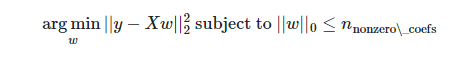

Можно таким способом выбрать необходимые три макрофактора из всего доступного набора модификаций факторов.

In [133]:
# history_df
target='level_of_debt_in_rub_percent_season_diff'

In [134]:
target

'level_of_debt_in_rub_percent_season_diff'

In [135]:
# пришлось восстановить датасет без лагов 4 и 5, так как они не используются и без них получается хуже R2

history_df = copy.deepcopy(debt_vvp_cpi_usd_rate_unmpl_urals)
history_df.rename(columns = {'vvp in mlrd rub': 'vvp', 'cpi in percent': 'cpi', 'USDRUB in rub': 'USDRUB',
                             'rate in percent': 'rate', 'unemployment rate in percent': 'unemployment', 
                             'urals_close': 'urals'}, inplace=True)
history_df.set_index(history_df['date'], drop=True, inplace=True)
decomposition = sm.tsa.seasonal_decompose(history_df['vvp'], model='additive')
season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
for temp_date, value in decomposition.seasonal.items():
    season_shift[temp_date.month] = value
history_df['vvp_season'] = history_df[['date', 'vvp']].apply(
    lambda x: x['vvp'] - season_shift[x['date'].month], axis=1)

for column in ['cpi', 'level_of_debt_in_rub_percent']:
    decomposition = sm.tsa.seasonal_decompose(history_df[column], model='additive')
    season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
    for temp_date, value in decomposition.seasonal.items():
        season_shift[temp_date.month] = value
    history_df['{}_season'.format(column)] = history_df[['date', column]].apply(
        lambda x: x[column] - season_shift[x['date'].month], axis=1)

pure_cols = ['level_of_debt_in_rub_percent','level_of_debt_in_rub_percent_season', 'vvp', 'vvp_season', 'cpi', 'cpi_season', 'USDRUB', 'rate', 
             'unemployment', 'urals']


for col in pure_cols:
    history_df[col + '_diff'] = history_df[col].diff()
#     history_df[col + '_log_yt_yt_1'] = np.log(history_df[col + '_diff'])
    if col != 'level_of_debt_in_rub_percent':
        history_df[col + '_log'] = np.log(history_df[col])
        history_df[col + '_pct'] = history_df[col].pct_change() 
        history_df[col + '_log_diff'] = history_df[col + '_log'] - history_df[col + '_log'].shift(1)       
        for lag in range(1, 4):
            history_df[col+ '_{}'.format(lag)] = history_df[col].shift(lag)
            history_df[col + '_log_{}'.format(lag)] = history_df[col + '_log'].shift(lag) 
            history_df[col + '_diff_{}'.format(lag)] = history_df[col + '_diff'].shift(lag) 
            history_df[col + '_pct_{}'.format(lag)] = history_df[col + '_pct'].shift(lag) 
            history_df[col + '_log_diff_{}'.format(lag)] = history_df[col + '_log_diff'].shift(lag)
            
data_for_corr=history_df.iloc[:,4:]

#### Попробуем линейную регрессию

In [136]:
from sklearn.linear_model import OrthogonalMatchingPursuit

# сначала подадим все значимые по однофакторному анализу факторы и их модификации
not_null_index=data_for_corr.isnull().sum().max()
X=data_for_corr[not_null_index:].reset_index(drop=True)
y=history_df[target][not_null_index:].reset_index(drop=True)

# X=data_for_corr
# y=history_df[target]

reg = OrthogonalMatchingPursuit(n_nonzero_coefs=3 ,normalize=False).fit(X, y)
print('R2 = ',reg.score(X, y), '\n')
reg.get_params(deep=True)
coefs = reg.coef_

get=coefs !=0
vv=data_for_corr.columns[get]

print('R2_adj = ', 1-(1-reg.score(X, y))*(len(X.iloc[:,1])-1)/(len(X.iloc[:,1])-3), '\n')

print('Used factors are ', vv.tolist(), '\n')
# print(coefs)

R2 =  0.2187020842773587 

R2_adj =  0.13646019841181756 

Used factors are  ['vvp_2', 'vvp_diff_3', 'vvp_season_diff'] 



Модель OrthogonalMatchingPursuit выбрала три не самые значимые переменных по результатам однофакторного анализа, но R2 получился выше требования в 0.5.

In [137]:
# будем предсказывать на стационарную модификацию зависимой переменной
# Попробуем использовать для построениния три самых значимых по результатам анализа фактора

In [138]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# подадим самые значимые по однофакторному анализу факторы и их модификации
not_null_index=data_for_corr.isnull().sum().max()
X=data_for_corr[not_null_index:].reset_index(drop=True)
y=history_df[target][not_null_index:].reset_index(drop=True)

X=X[['cpi_season_diff_1','USDRUB_pct_2','unemployment_log']]

reg = OrthogonalMatchingPursuit(n_nonzero_coefs=3 ,normalize=False).fit(X, y)
print('R2 = ',reg.score(X, y), '\n')
reg.get_params(deep=True)
coefs = reg.coef_

print('R2_adj = ', 1-(1-reg.score(X, y))*(len(X.iloc[:,1])-1)/(len(X.iloc[:,1])-3), '\n')
print('Used factors are ',['cpi_season_diff_1','USDRUB_pct_2','unemployment_log'], '\n')


R2 =  0.253813694113488 

R2_adj =  0.1752677671780657 

Used factors are  ['cpi_season_diff_1', 'USDRUB_pct_2', 'unemployment_log'] 



Видно, что метод  OrthogonalMatchingPursuit (при условии что мы знаем лучшие факторы), выбирает не совсем оптимальные факторы.
Но если мы не знаем какие переменные самые значимые, то OrthogonalMatchingPursuit может существенно упростить поиск факторов для многофакторной модели.

Однако R2 получился ниже требования 0.5, поэтому рассмотрим далее квадратичную регрессию.


In [139]:
target

'level_of_debt_in_rub_percent_season_diff'

In [140]:
# Попробуем добавить еще два некоррелированных лага

#   первую разность ИПЦ без сезонности с лагом 1,
#   процентное изменение USDRUB с лагом 2,
#   Безработица (или логарифм Безработицы),
#   логарифм изменения Urals с лагом 1

#   + модификации ИПЦ (Процентное изменение лаг 1, Логарифм изменения лаг 1) и Курса доллара
#   (Первая разность лаг 2, Логарифм изменения лаг 2) - можно добавить в многофакторный анализ
# по результатам корреляционного анализа

In [141]:
from sklearn.linear_model import OrthogonalMatchingPursuit

# сначала подадим все значимые по однофакторному анализу факторы и их модификации
not_null_index=data_for_corr.isnull().sum().max()
X=data_for_corr[not_null_index:].reset_index(drop=True)
y=history_df[target][not_null_index:].reset_index(drop=True)

# X=data_for_corr
# y=history_df[target]

reg = OrthogonalMatchingPursuit(n_nonzero_coefs=5 ,normalize=False).fit(X, y)
print('R2 = ',reg.score(X, y), '\n')
reg.get_params(deep=True)
coefs = reg.coef_

get=coefs !=0
vv=data_for_corr.columns[get]

print('R2_adj = ', 1-(1-reg.score(X, y))*(len(X.iloc[:,1])-1)/(len(X.iloc[:,1])-3), '\n')

print('Used factors are ', vv.tolist(), '\n')
# print(coefs)

R2 =  0.35268461683398 

R2_adj =  0.28454615544808315 

Used factors are  ['vvp_diff', 'vvp_2', 'vvp_diff_3', 'vvp_season_diff', 'vvp_season_diff_1'] 



По 5 зависимым переменным ортогональный матчинг показал R2adj=0.28, уже больше, можем оптимальным подбором улучшить результат

In [142]:
target

'level_of_debt_in_rub_percent_season_diff'

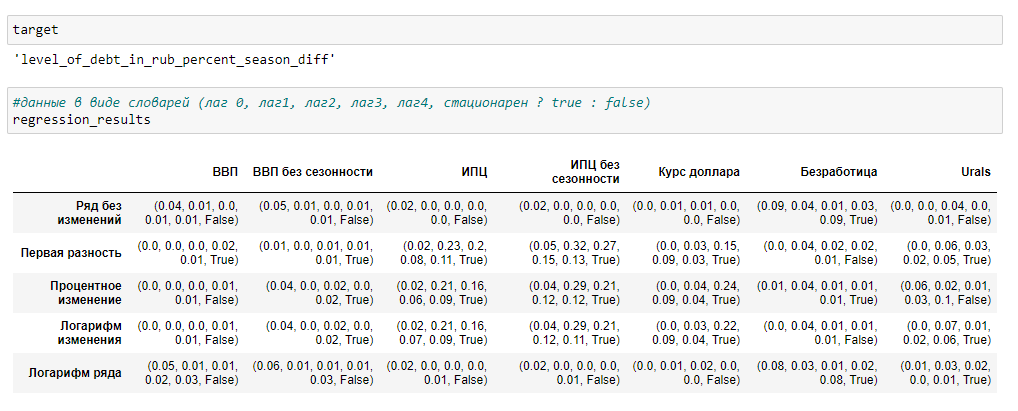

In [143]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# подадим самые значимые по однофакторному анализу факторы и их модификации
not_null_index=data_for_corr.isnull().sum().max()
X=data_for_corr[not_null_index:].reset_index(drop=True)
y=history_df[target][not_null_index:].reset_index(drop=True)

cols_to_fit=['cpi_season_diff_1','unemployment_log','USDRUB_pct_2','cpi_season_diff_2','cpi_season_diff_3']

X=X[cols_to_fit]

reg = OrthogonalMatchingPursuit(n_nonzero_coefs=3 ,normalize=False).fit(X, y)
print('R2 = ',reg.score(X, y), '\n')
reg.get_params(deep=True)
coefs = reg.coef_

print('R2_adj = ', 1-(1-reg.score(X, y))*(len(X.iloc[:,1])-1)/(len(X.iloc[:,1])-3), '\n')
print('Used factors are ',cols_to_fit, '\n')


R2 =  0.4542762854273713 

R2_adj =  0.3968316838934104 

Used factors are  ['cpi_season_diff_1', 'unemployment_log', 'USDRUB_pct_2', 'cpi_season_diff_2', 'cpi_season_diff_3'] 



In [144]:
import itertools
cols_to_fit
for pair in itertools.combinations(cols_to_fit,2):
    find_name(filtered_corr_values, list(pair)[0], list(pair)[1])

Корреляция между факторами < 0.8[Corr values    0.013818
Name: (cpi_season_diff_1, unemployment_log), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.665514
Name: (cpi_season_diff_1, USDRUB_pct_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.377386
Name: (cpi_season_diff_1, cpi_season_diff_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.27688
Name: (cpi_season_diff_1, cpi_season_diff_3), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.053193
Name: (unemployment_log, USDRUB_pct_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.028841
Name: (unemployment_log, cpi_season_diff_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.048557
Name: (unemployment_log, cpi_season_diff_3), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.315425
Name: (USDRUB_pct_2, cpi_season_diff_2), dtype: float64]
Корреляция между факторами < 0.8[Corr values    0.012099
Name: (USDR

Итоговый результат с линейной регрессией:

R2 =  0.4542762854273713 

R2_adj =  0.3968316838934104 

Used factors are  ['cpi_season_diff_1', 'unemployment_log', 'USDRUB_pct_2', 'cpi_season_diff_2', 'cpi_season_diff_3']

### Проведем F-тест для линейной множественной регрессии 

In [145]:
target

'level_of_debt_in_rub_percent_season_diff'

In [146]:
import statsmodels.api as sm

not_null_index=data_for_corr.isnull().sum().max()
X=data_for_corr[not_null_index:].reset_index(drop=True)
y=history_df[target][not_null_index:].reset_index(drop=True)

cols_to_fit=['cpi_season_diff_1','unemployment_log','USDRUB_pct_2','cpi_season_diff_2','cpi_season_diff_3']

X=X[cols_to_fit]

XX= X.to_numpy()
y= y.to_numpy()

X=np.array(XX, dtype=float)
X = sm.add_constant(X)
y=np.array(y, dtype=float)
# X - XX


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     2.992
Date:                Fri, 10 Dec 2021   Prob (F-statistic):             0.0429
Time:                        21:40:39   Log-Likelihood:                 10.322
No. Observations:                  22   AIC:                            -8.645
Df Residuals:                      16   BIC:                            -2.098
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1786      0.640      0.279      0.7

p-value < 5%  - нулевая гипотеза отклоняется 

коэффициенты при всех регрессорах не равны нулю, регрессия значима

по модели OLS statsmodels R2adj несколько скорректирован относительно результата пакета ортогонального матчина и составляет **0.322**

In [147]:
results.predict()

array([ 0.22846231,  0.18693929,  0.06226393,  0.03150027, -0.00283567,
       -0.12621458, -0.11971653, -0.15993235, -0.21777157, -0.28919625,
       -0.1406785 , -0.00991091,  0.10163427,  0.1050413 ,  0.04768375,
       -0.09604678, -0.15666966, -0.27043354, -0.11550928, -0.0705745 ,
        0.1017496 ,  0.19142938])

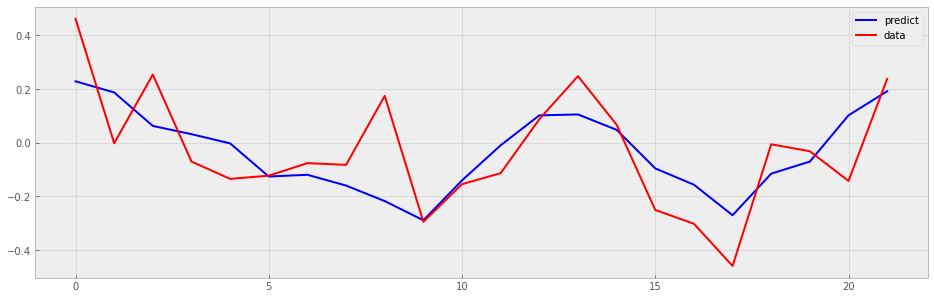

In [148]:
fig = plt.figure(figsize=(16, 5))
plt.plot(results.predict()  ,'b')
plt.plot(y.tolist()  ,'r')
plt.legend(['predict','data'])
plt.show()

#### Попробуем квадратичную регрессию

In [149]:
target

'level_of_debt_in_rub_percent_season_diff'

In [150]:
# подадим самые значимые по однофакторному анализу с квадратичной регрессией факторы и их модификации
factor_to_check = history_df[[target,'cpi_season_diff_1','USDRUB_log_diff_2','urals_diff']]
factor_to_check.dropna(inplace=True)
x = factor_to_check[factor_to_check.columns[1:]]
y = factor_to_check[target]

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_train = poly.transform(x)
regressionModel = linear_model.Ridge(alpha=0)
trainDependentVariables = y.reset_index(drop=True).astype(float)
result2 = regressionModel.fit(poly_train, trainDependentVariables)
    
R2 = round(calc_metrics(trainDependentVariables, result2.predict(poly_train)), 2)
print('R2 with square regression = ' , R2)

R2 with square regression =  0.7


Получили требуемый R2

In [151]:
d=result2.predict(poly_train)

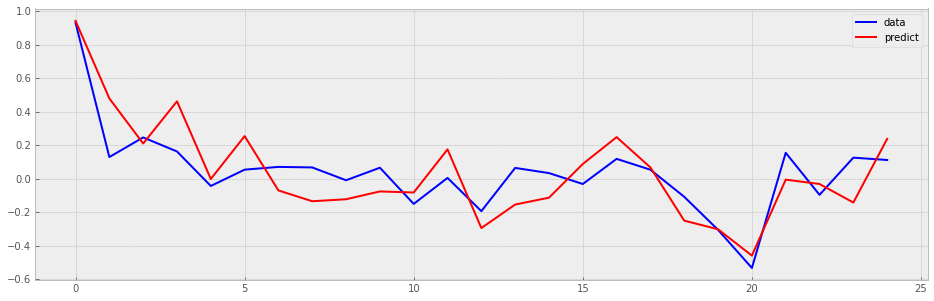

In [152]:
fig = plt.figure(figsize=(16, 5))
plt.plot(d  ,'b')
plt.plot(y.tolist()  ,'r')
plt.legend(['data','predict'])
plt.show()

In [153]:
# history_df.tail()

####  Предсказание

In [154]:
# создадим отдельный датасет для прогнозных значений. Данные собраны вручную в файле
forecast_on = 'forecasts_data_0_5.xlsx'
forecast_df = pd.read_excel(forecast_on)
forecast_df


date  vvp in mlrd rub  cpi in percent  USDRUB in rub  \
0  2021-09-30     28544.942439      661.928300        72.7350   
1  2021-12-31     32050.548841      666.734374        74.1904   
2  2022-03-31     27574.130000      667.794426        72.6000   
3  2022-06-30     31778.693000      673.420954        72.6000   
4  2022-09-30     29401.290712      682.261120        72.6000   
5  2022-12-31     33012.065306      685.958671        72.6000   

   rate in percent  unemployment rate in percent  Urals in USD  
0             6.75                           6.6          66.0  
1             7.60                           6.6          66.0  
2             7.80                           4.6          62.2  
3             7.80                           4.6          62.2  
4             7.80                           4.6          62.2  
5             7.80                           4.6          62.2

In [155]:
pred_df = copy.deepcopy(forecast_df)
pred_df.rename(columns = {'vvp in mlrd rub': 'vvp', 'cpi in percent': 'cpi', 'USDRUB in rub': 'USDRUB',
                             'rate in percent': 'rate', 'unemployment rate in percent': 'unemployment', 
                             'Urals in USD': 'urals'}, inplace=True)
pred_df['date'] = pd.to_datetime(pred_df['date'])
pred_df.set_index(pred_df['date'], drop=True, inplace=True)
# у нас есть данные с лагом, поэтому надо добавить исторических данных в датасет для предсказания
dop = history_df.iloc[-4:,0].to_frame().join(history_df.iloc[-4:,4:10])
pred_df = dop.append(pred_df)
# pred_df

In [156]:
# учтем сезонность из исторических данных для ВВП и ИЦП в данных для предсказания
for column in ['vvp', 'cpi']:
    decomposition = sm.tsa.seasonal_decompose(history_df[column], model='additive')
    season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
    for temp_date, value in decomposition.seasonal.items():
        season_shift[temp_date.month] = value
    pred_df['{}_season'.format(column)] = pred_df[['date', column]].apply(
        lambda x: x[column] - season_shift[x['date'].month], axis=1)


In [157]:
# нагенерируем фичей
pure_cols = ['vvp', 'cpi', 'USDRUB', 'rate', \
             'unemployment', 'urals' , 'vvp_season' ,'cpi_season']

pred_df['vvp'] = pd.to_numeric(pred_df['vvp'], errors='coerce')
pred_df['USDRUB'] = pd.to_numeric(pred_df['USDRUB'], errors='coerce')
pred_df['rate'] = pd.to_numeric(pred_df['rate'], errors='coerce')
pred_df['unemployment'] = pd.to_numeric(pred_df['unemployment'], errors='coerce')
pred_df['urals'] = pd.to_numeric(pred_df['urals'], errors='coerce')

for col in pure_cols:
    pred_df[col + '_diff'] = pred_df[col].diff()
#     if col != 'level_of_debt_in_rub_percent':
    pred_df[col + '_log'] = np.log(pred_df[col])
    pred_df[col + '_pct'] = pred_df[col].pct_change() 
    pred_df[col + '_log_diff'] = pred_df[col + '_log'] - pred_df[col + '_log'].shift(1)
    for lag in range(1, 4):
        pred_df[col + '_log_{}'.format(lag)] = pred_df[col + '_log'].shift(lag) 
        pred_df[col + '_diff_{}'.format(lag)] = pred_df[col + '_diff'].shift(lag) 
        pred_df[col + '_pct_{}'.format(lag)] = pred_df[col + '_pct'].shift(lag) 
        pred_df[col + '_log_diff_{}'.format(lag)] = pred_df[col + '_log_diff'].shift(lag) 
        
# возьмем строки только для предсказания
pred_df = pred_df.iloc[4:]
pred_df

date           vvp         cpi   USDRUB  rate  unemployment  \
date                                                                           
2021-09-30 2021-09-30  28544.942439  661.928300  72.7350  6.75           6.6   
2021-12-31 2021-12-31  32050.548841  666.734374  74.1904  7.60           6.6   
2022-03-31 2022-03-31  27574.130000  667.794426  72.6000  7.80           4.6   
2022-06-30 2022-06-30  31778.693000  673.420954  72.6000  7.80           4.6   
2022-09-30 2022-09-30  29401.290712  682.261120  72.6000  7.80           4.6   
2022-12-31 2022-12-31  33012.065306  685.958671  72.6000  7.80           4.6   

            urals    vvp_season  cpi_season     vvp_diff  ...  \
date                                                      ...   
2021-09-30   66.0  27901.031049  664.427590 -2308.144617  ...   
2021-12-31   66.0  30291.318993  668.125141  3505.606402  ...   
2022-03-31   62.2  29205.692009  665.439170 -4476.418841  ...   
2022-06-30   62.2  32550.272228  671.886153  4204.563000  ...   
2022-09-30   62.2  28757.379322  684.760409 -2377.402288  ...   
2022-12-31   62.2  31252.835458  687.349438  3610.774594  ...   

            cpi_season_pct_1  cpi_season_log_diff_1  cpi_season_log_2  \
date                                                                    
2021-09-30          0.021543               0.021314          6.449277   
2021-12-31          0.028740               0.028335          6.470591   
2022-03-31          0.005565               0.005550          6.498926   
2022-06-30         -0.004020              -0.004028          6.504475   
2022-09-30          0.009688               0.009642          6.500447   
2022-12-31          0.019161               0.018980          6.510089   

            cpi_season_diff_2  cpi_season_pct_2  cpi_season_log_diff_2  \
date                                                                     
2021-09-30           9.453977          0.015180               0.015066   
2021-12-31          13.620455          0.021543               0.021314   
2022-03-31          18.562391          0.028740               0.028335   
2022-06-30           3.697551          0.005565               0.005550   
2022-09-30          -2.685971         -0.004020              -0.004028   
2022-12-31           6.446983          0.009688               0.009642   

            cpi_season_log_3  cpi_season_diff_3  cpi_season_pct_3  \
date                                                                
2021-09-30          6.434211          10.891477          0.017799   
2021-12-31          6.449277           9.453977          0.015180   
2022-03-31          6.470591          13.620455          0.021543   
2022-06-30          6.498926          18.562391          0.028740   
2022-09-30          6.504475           3.697551          0.005565   
2022-12-31          6.500447          -2.685971         -0.004020   

            cpi_season_log_diff_3  
date                               
2021-09-30               0.017643  
2021-12-31               0.015066  
2022-03-31               0.021314  
2022-06-30               0.028335  
2022-09-30               0.005550  
2022-12-31              -0.004028  

[6 rows x 137 columns]

In [158]:
# factor_to_check = pred_df[['cpi_season_diff_1','USDRUB_log_diff_2','urals_diff']]
# factor_to_check.dropna(inplace=True)
# x = factor_to_check[factor_to_check.columns]
# poly_train = poly.transform(x)
# y_pred = result2.predict(poly_train)
# y_pred

In [159]:
# будем предсказывать линейную регерессию

cols_to_fit=['cpi_season_diff_1','unemployment_log','USDRUB_pct_2','cpi_season_diff_2','cpi_season_diff_3']

factor_to_check = pred_df[cols_to_fit]
factor_to_check.dropna(inplace=True)
X = factor_to_check[factor_to_check.columns]

XX= X.to_numpy()

X=np.array(XX, dtype=float)
X = sm.add_constant(X)
y_pred = results.predict(X)
y_pred

array([ 0.23237375,  0.43647293,  0.43883244, -0.06265666, -0.26913443,
        0.05053096])

In [160]:
# Для того что бы, перейти от season_diff в целевой переменной к "нормально", необходимо произвести операции в обратном порядке

In [161]:
last_in_history = history_df['level_of_debt_in_rub_percent_season'].iloc[-1]
y_pred_cum_sum = np.cumsum(y_pred)
y_pred_cum_sum += last_in_history
pred_df['prediction'] = y_pred_cum_sum

In [162]:
decomposition = sm.tsa.seasonal_decompose(history_df['level_of_debt_in_rub_percent'], model='additive')
season_shift = {3: 0, 6: 0, 9: 0, 12: 0}
for temp_date, value in decomposition.seasonal.items():
    season_shift[temp_date.month] = value
pred_df['prediction'] = pred_df[['date', 'prediction']].apply(
    lambda x: x['prediction'] + season_shift[x['date'].month], axis=1)

In [163]:
# финальный результат полученный данным способом
pred_df['prediction']

date
2021-09-30    7.452630
2021-12-31    7.703550
2022-03-31    8.225383
2022-06-30    8.254619
2022-09-30    7.996145
2022-12-31    7.861122
Name: prediction, dtype: float64

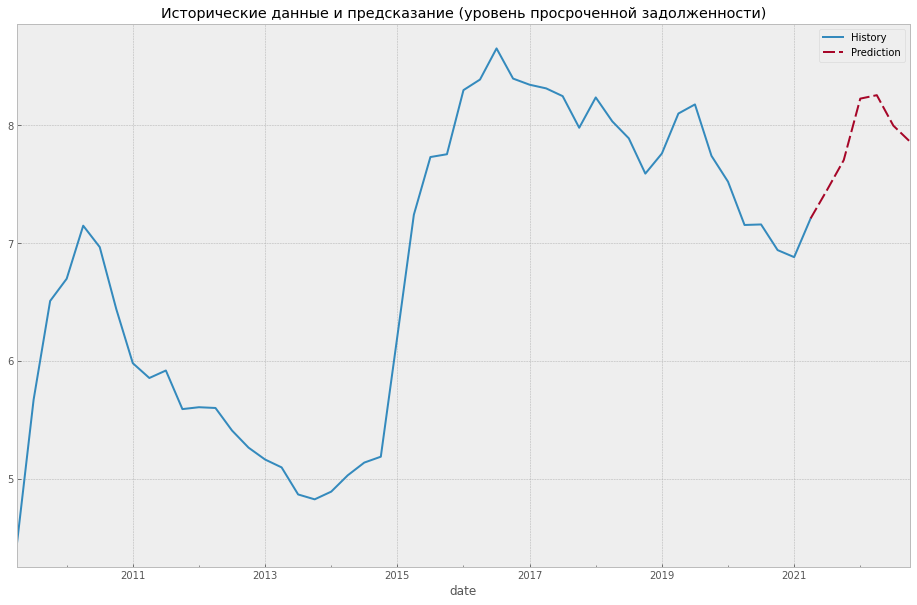

In [164]:
# Посмотрим как выглядят исторические данные и предсказание
temp_df = pd.concat([history_df['level_of_debt_in_rub_percent'][-1:], pred_df['prediction']])
plt.figure(figsize=(16,10))
history_df['level_of_debt_in_rub_percent'].plot(label='History')
temp_df.plot(dashes=[6, 2], label='Prediction')
plt.title('Исторические данные и предсказание (уровень просроченной задолженности)')
plt.legend()
plt.show()